In [1]:
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.image_segmentation.git
from gcpds.image_segmentation.losses import DiceCoefficient

  Cloning https://github.com/UN-GCPDS/python-gcpds.image_segmentation.git to /tmp/pip-req-build-yauqbjuh
  Running command git clone --filter=blob:none --quiet https://github.com/UN-GCPDS/python-gcpds.image_segmentation.git /tmp/pip-req-build-yauqbjuh
  Resolved https://github.com/UN-GCPDS/python-gcpds.image_segmentation.git to commit 01b06059d3a0d2980eea4d0b1e964718cab173ee
  Preparing metadata (setup.py) ... done
  Created wheel for gcpds-image_segmentation: filename=gcpds_image_segmentation-0.1a0-py3-none-any.whl size=39398 sha256=a0f6a9348cb9d972b1b64c3a95f6ad8bffacc7cc8e236874b2499a654620241e
  Stored in directory: /tmp/pip-ephem-wheel-cache-zm0fx0yi/wheels/88/5f/53/179661a69fb02b7c932e1f3bff4d7255dc2bcbe9a72c883761
Successfully built gcpds-image_segmentation


2024-12-21 15:50:04.125268: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-21 15:50:04.125382: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-21 15:50:04.288351: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
!git clone https://github.com/hdperezn/MIDI_functions.git
#!sudo apt install -y fluidsynth
#!pip install --upgrade pyfluidsynth
!pip install pretty_midi

Cloning into 'MIDI_functions'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 185 (delta 77), reused 71 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (185/185), 8.40 MiB | 16.19 MiB/s, done.
Resolving deltas: 100% (77/77), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 52.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.3 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=b35bd8c3c749103d81b2a95a52d1e9f9100b7ea2d6e3b73026af53e74c0a3028
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [54]:
import os
import math
import IPython
import string
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf

# import matplotlib.pyplot as plt


# # import fluidsynth
# import glob
# import pathlib
# import pretty_midi

# from IPython import display
# from scipy.spatial.distance import cdist
# from MIDI_functions.functions.MIDI_functions import cut_midi_secTrial,piano_roll_to_pretty_midi
# from MIDI_functions.functions.UNetLike_PianoRolls import UNet_Pianoroll, Autoencoder_Pianoroll


# from tensorflow.keras.regularizers import l1_l2
# from sklearn.model_selection import StratifiedShuffleSplit
# #from scikeras.wrappers import KerasClassifier
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import accuracy_score, cohen_kappa_score, ConfusionMatrixDisplay

# Features

In [4]:
from MIDI_functions.functions.evaluation_MIDIs import extract_feature, metrics, metrics_calculation
from MIDI_functions.functions.utils_evaluation_MIDI import c_dist

from argparse import ArgumentParser
from sklearn.model_selection import LeaveOneOut
import glob
import copy
import os
import pretty_midi
from pprint import pprint

In [5]:
def display_audio(pm: pretty_midi.PrettyMIDI, _SAMPLING_RATE, seconds=60):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

from scipy import stats
def pdf(A, B, num_sample=1000):
    pdf_A = stats.gaussian_kde(A)
    pdf_B = stats.gaussian_kde(B)
    sample_A = np.linspace(np.min(A), np.max(A), num_sample)
    sample_B = np.linspace(np.min(B), np.max(B), num_sample)
    return pdf_A(sample_A), pdf_B(sample_B)

In [6]:
!mkdir /kaggle/working/music_VAEs

In [7]:
!mkdir /kaggle/working/music_VAEs/cka_piano_roll

In [8]:
!mkdir /kaggle/working/music_VAEs/cka_piano_roll/all_windows_MIDI_features

In [9]:
N_subje = 32
path_MIDIs = '/kaggle/input/output-midi/all_windows_MIDI_generated'
path_features = '/kaggle/working/music_VAEs/cka_piano_roll/all_windows_MIDI_features'
list_num = list(range(N_subje))

# Generated MIDI metrics

In [10]:
import numpy as np

In [11]:
list_num = list(range(N_subje))  # Asegúrate de que N_subje esté correctamente definido antes de esta línea.

for i in range(0, len(list_num), 2):
    sub_par = list_num[i]
    sub_impar = list_num[i + 1] if i + 1 < len(list_num) else None

    if sub_impar is not None:
        print(f'sujetos N: {sub_par+1} y {sub_impar+1}')
    else:
        print(f'sujeto N: {sub_par+1}')

    for fold in range(5):
        # Asegúrate de que path_MIDIs y path_features estén definidos anteriormente en tu código.
        set1 = glob.glob(os.path.join(path_MIDIs, 'MIDI_sub_'+str(sub_par+1), f'mid_fold{fold}*'))
        #print(set1)
        if sub_impar is not None:
            set2 = glob.glob(os.path.join(path_MIDIs, 'MIDI_sub_'+str(sub_impar+1), f'mid_fold{fold}*'))
        else:
            set2 = []

        num_samples = min(len(set2), len(set1)) if set2 else len(set1)
        print(f"fold {fold+1}, with samples: {num_samples}")

        evalset = {
            'total_used_pitch': np.zeros((num_samples, 1)),
            'pitch_range': np.zeros((num_samples, 1)),
            'avg_IOI': np.zeros((num_samples, 1)),
            'total_pitch_class_histogram': np.zeros((num_samples, 12)),
       #     'pitch_class_transition_matrix': np.zeros((num_samples, 12, 12))
        }

        set1_eval, set2_eval = metrics_calculation(evalset, set1, set2)

        np.savez(path_features + '/MIDI_sub_'+str(sub_par+1)+f'_fold_{fold}', total_used_pitch=set1_eval['total_used_pitch'],pitch_range=set1_eval['pitch_range'],
                avg_IOI=set1_eval['avg_IOI'],total_pitch_class_histogram=set1_eval['total_pitch_class_histogram'],)
                 #pitch_class_transition_matrix=set1_eval['pitch_class_transition_matrix'])

        if sub_impar is not None:
            np.savez(path_features + '/MIDI_sub_'+str(sub_impar+1)+f'_fold_{fold}', total_used_pitch=set2_eval['total_used_pitch'],pitch_range=set2_eval['pitch_range'],
                    avg_IOI=set2_eval['avg_IOI'],total_pitch_class_histogram=set2_eval['total_pitch_class_histogram'],)
                     #pitch_class_transition_matrix=set2_eval['pitch_class_transition_matrix'])


sujetos N: 1 y 2
fold 1, with samples: 79
fold 2, with samples: 79
fold 3, with samples: 79
fold 4, with samples: 79
fold 5, with samples: 79
sujetos N: 3 y 4
fold 1, with samples: 79
fold 2, with samples: 79
fold 3, with samples: 79
fold 4, with samples: 79
fold 5, with samples: 79
sujetos N: 5 y 6
fold 1, with samples: 79
fold 2, with samples: 79
fold 3, with samples: 79
fold 4, with samples: 79
fold 5, with samples: 79
sujetos N: 7 y 8
fold 1, with samples: 79
fold 2, with samples: 79
fold 3, with samples: 79
fold 4, with samples: 79
fold 5, with samples: 79
sujetos N: 9 y 10
fold 1, with samples: 79
fold 2, with samples: 79
fold 3, with samples: 79
fold 4, with samples: 79
fold 5, with samples: 79
sujetos N: 11 y 12
fold 1, with samples: 79
fold 2, with samples: 79
fold 3, with samples: 79
fold 4, with samples: 79
fold 5, with samples: 79
sujetos N: 13 y 14
fold 1, with samples: 79
fold 2, with samples: 79
fold 3, with samples: 79
fold 4, with samples: 79
fold 5, with samples: 79
s

# Training set Metrics

In [12]:
# import mido
# import matplotlib.pyplot as plt
# import numpy as np

# def midi_to_piano_roll(midi_path):
#     """
#     Converts a MIDI file to a piano roll matrix.
#     """
#     mid = mido.MidiFile(midi_path)
#     ticks_per_beat = mid.ticks_per_beat
#     tempo = 500000  # Default tempo if no tempo change messages
#     time_per_tick = tempo / 1e6 / ticks_per_beat
#     events = []

#     for track in mid.tracks:
#         time = 0
#         for msg in track:
#             time += msg.time
#             if msg.type == 'note_on' or msg.type == 'note_off':
#                 velocity = msg.velocity if msg.type == 'note_on' else 0
#                 events.append((time, msg.note, velocity))

#     # Convert to absolute time
#     events.sort(key=lambda x: x[0])
#     abs_time = 0
#     for i, event in enumerate(events):
#         abs_time += event[0]
#         events[i] = (abs_time * time_per_tick, event[1], event[2])

#     # Create piano roll
#     max_time = int(events[-1][0] * 100)  # Scale time to fit in the roll
#     piano_roll = np.zeros((128, max_time))

#     for i, event in enumerate(events):
#         if event[2] > 0:  # Note-on event
#             end_time = max_time if i + 1 == len(events) else int(events[i + 1][0] * 100)
#             piano_roll[event[1], int(event[0] * 100):end_time] = event[2]

#     return piano_roll

# def plot_piano_roll(piano_roll):
#     """
#     Plots the piano roll.
#     """
#     plt.figure(figsize=(12, 6))
#     plt.imshow(piano_roll, aspect='auto', cmap='hot', origin='lower')
#     plt.colorbar(label='Velocity')
#     plt.xlabel('Time (frames)')
#     plt.ylabel('MIDI Note Number')
#     plt.title('Piano Roll')
#     plt.show()

# # Example usage with your MIDI file
# midi_path = "/kaggle/working/all_windows_MIDI_original_windows/training_sample100.mid"
# piano_roll = midi_to_piano_roll(midi_path)
# plot_piano_roll(piano_roll)

In [13]:
# !pip install fluidsynth

In [14]:
# import os
# import math
# import IPython
# import string
# import pickle
# import numpy as np
# import pandas as pd
# import tensorflow as tf

# import matplotlib.pyplot as plt



# import glob
# import pathlib
# import pretty_midi

# from IPython import display
# from scipy.spatial.distance import cdist
# from MIDI_functions.functions.MIDI_functions import cut_midi_secTrial,piano_roll_to_pretty_midi
# from MIDI_functions.functions.UNetLike_PianoRolls import UNet_Pianoroll, Autoencoder_Pianoroll


# from tensorflow.keras.regularizers import l1_l2
# from sklearn.model_selection import StratifiedShuffleSplit
# #from scikeras.wrappers import KerasClassifier
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import accuracy_score, cohen_kappa_score, ConfusionMatrixDisplay

In [15]:
# def pading_midis(Prolls_windowed, Prolls_trial_len = 128):
#   """
#   function to cut or padding the midi arrays to equal lengs
#   """
#   Prolls_cut = []
#   for i in range(len(Prolls_windowed)):
#     if Prolls_windowed[i].shape[2] >= Prolls_trial_len:
#       x = Prolls_windowed[i][:,:,0:Prolls_trial_len]
#       Prolls_cut.append(x)
#     else:
#       dif = Prolls_trial_len - Prolls_windowed[i].shape[2]
#       x = np.concatenate( (Prolls_windowed[i][:,:,:],Prolls_windowed[i][:,:,-dif::] ), axis = 2)
#       Prolls_cut.append(x)
#   return np.concatenate(np.array(Prolls_cut, dtype=object), axis = 0)

In [16]:
# path_midi = '/kaggle/working/MIDI_functions/deap_midis'
# data_dir = pathlib.Path(path_midi)
# filenames = glob.glob(str(data_dir/'*.mid*'))
# print('Number of files:', len(filenames))

In [17]:
# _SAMPLING_RATE = 16000
# fProll = 20

In [18]:
# Prolls_windowed_train = []
# for i in range(len(filenames)):
#   #load MIDI and create array
#   Proll = pretty_midi.PrettyMIDI(filenames[i]).get_piano_roll(fs=fProll)
#   if i in [0, 13, 16, 21, 39]:
#     Proll_cut = cut_midi_secTrial(Proll, 9)
#   elif i in [9, 11]:
#     Proll_cut = cut_midi_secTrial(Proll, 8)
#   else:
#     Proll_cut = cut_midi_secTrial(Proll, 10)
#   Prolls_windowed_train.append(Proll_cut[:])

# Prolls_array_train = pading_midis(Prolls_windowed_train, Prolls_trial_len = 128)
# Prolls_train_mask = np.where(Prolls_array_train>0,1,0)

# print('these are de dims of the MIDI data to use in the neural network: ')
# print('     train data:', Prolls_array_train.shape) #sample x pitch x time

In [19]:
# Prolls_train_mask.shape

In [20]:
# !mkdir /kaggle/working/all_windows_MIDI_original_windows

In [21]:
# np.load(f'/kaggle/input/output-midi/all_windows_piano_roll_generated/sub{12}_fold{3}.npy').shape

In [22]:
# S12 = np.load(f'/kaggle/input/output-midi/all_windows_piano_roll_generated/sub{12}_fold{3}.npy')

In [23]:
# print(S12[0, :, :, 0])

In [24]:
# plt.imshow(S12[0, :, :, 0].T)

In [25]:
# type(S12[0, :, :, 0])

In [26]:
# def rebuilPianoRollsoriginalwindow(X):
#   """
#   this function takes an output array from the vae net and returns
#   a piano roll array ready to be converted into MIDI file
#   input
#   X: array with dimensions [samples, time, pitch, 1]
#   output
#   proll_padding: array with dimension [sample x pitch x time ]
#   """
#   #trasnpose to [sample x time x pitch]
#   #proll = X[:,:,:,0].transpose(0,2,1)
#   proll_padding =np.pad(X, ((0,0), (0,0), (0, 0)), 'constant')
#   return proll_padding

In [27]:
# !mkdir /kaggle/working/all_windows_MIDI_original_windows

In [28]:
# Prolls_array_train.shape

In [29]:
# save_generated_midis = f"/kaggle/working/all_windows_MIDI_original_windows"


# midiGEnerated = rebuilPianoRollsoriginalwindow(Prolls_train_mask)
# print(f'{"saving MIDI original window":-^50}')
#  # --- create directoris to save MIDI ------
# midi_save_path = os.path.join(save_generated_midis)
# try:
#     os.mkdir(midi_save_path)
# except OSError as error:
#     print(error)
# #----- saving data --------
# for sample in range(midiGEnerated.shape[0]):
#   proll = np.where((midiGEnerated[sample])>0.1,100,0)
#   mid_new = piano_roll_to_pretty_midi(proll, fs=fProll)
#   mid_new.write(midi_save_path+'/training_sample'+str(sample)+'.mid')
# print('--------- MIDI data saved---')
# print(f'{"MIDI data saved":-^50}')

In [30]:
# plt.imshow(midiGEnerated[sample])

In [31]:
# type(midiGEnerated[sample])

In [32]:
!mkdir /kaggle/working/music_VAEs/MIDI/
!mkdir /kaggle/working/music_VAEs/MIDI/features_train_database

In [33]:
path_midi = '/kaggle/input/output-midi/MIDI_functions/deap_midis'
path_features_train = '/kaggle/working/music_VAEs/MIDI/features_train_database/'

In [34]:
set1 = glob.glob(os.path.join(path_midi, '*'))
set2 = glob.glob(os.path.join(path_midi, '*'))

num_samples = min(len(set2), len(set1))

evalset = {
    'total_used_pitch': np.zeros((num_samples, 1))
    , 'pitch_range': np.zeros((num_samples, 1))
    , 'avg_IOI': np.zeros((num_samples, 1))
    , 'total_pitch_class_histogram': np.zeros((num_samples, 12))
    #, 'pitch_class_transition_matrix': np.zeros((num_samples, 12, 12))
      }
set1_eval, set2_eval = metrics_calculation(evalset, set1, set2)

np.savez(path_features_train + '/MIDI_train', total_used_pitch=set1_eval['total_used_pitch'],pitch_range=set1_eval['pitch_range'],
        avg_IOI=set1_eval['avg_IOI'],total_pitch_class_histogram=set1_eval['total_pitch_class_histogram'],
        #pitch_class_transition_matrix=set1_eval['pitch_class_transition_matrix'],
        )

loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
metrics_list = list(evalset.keys())


set1_intra = np.zeros((num_samples, len(metrics_list), num_samples - 1))
set_train_eval = set1_eval
# Calculate Intra-set Metrics
for i, metric in enumerate(metrics_list):
  for train_index, test_index in loo.split(np.arange(num_samples)):
      set1_intra[test_index[0]][i] = c_dist(
          set_train_eval[metrics_list[i]][test_index], set_train_eval[metrics_list[i]][train_index])
plot_set1_intra = np.nan_to_num(np.transpose(
    set1_intra, (1, 0, 2)).reshape(len(metrics_list), -1))
output_set_training = {}
training_pdfs = []
for i, metric in enumerate(metrics_list):
  pdf_, _ = pdf(plot_set1_intra[i], plot_set1_intra[i], num_sample=1000)
  training_pdfs.append(pdf_)

  mean = np.mean(plot_set1_intra[i])
  std = np.std(plot_set1_intra[i])

  output_set_training[metric] = [mean, std]

In [35]:
num_samples = 71
evalset = {
        'total_used_pitch': np.zeros((num_samples, 1))
        , 'pitch_range': np.zeros((num_samples, 1))
        , 'avg_IOI': np.zeros((num_samples, 1))
        , 'total_pitch_class_histogram': np.zeros((num_samples, 12))
        #, 'pitch_class_transition_matrix': np.zeros((num_samples, 12, 12))
          }

In [36]:
set_train_eval['total_used_pitch'].shape

(40, 1)

In [37]:
set_train_eval['pitch_range'].shape

(40, 1)

In [38]:
set_train_eval['avg_IOI'].shape

(40, 1)

In [39]:
set_train_eval[ 'total_pitch_class_histogram'].shape

(40, 12)

In [40]:
path_features_train = '/kaggle/working/music_VAEs/MIDI/features_train_database/'
num_samples = 40

print('Train MIDI database')
#load evalset1
set_train_eval = np.load(path_features_train+'MIDI_train.npz')
#load2 = np.load(path_features_train+'MIDI_train_data_file2.npy')
#load3 = np.load(path_features_train+'MIDI_train_data_file3.npy')
# set_train_eval = { 'total_used_pitch': load1[0],'pitch_range': load1[1],
#         'avg_pitch_shift':load1[2],'avg_IOI': load1[3],'total_used_note': load1[4],
#         'total_pitch_class_histogram': load2[0],'note_length_hist': load2[1],
#         'pitch_class_transition_matrix': load3[0],'note_length_transition_matrix': load3[1]
#         }


loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
metrics_list = list(evalset.keys())

set1_intra = np.zeros((num_samples, len(metrics_list), num_samples - 1))



# Calculate Intra-set Metrics
for i, metric in enumerate(metrics_list):
  for train_index, test_index in loo.split(np.arange(num_samples)):
      set1_intra[test_index[0]][i] = c_dist(
          set_train_eval[metrics_list[i]][test_index], set_train_eval[metrics_list[i]][train_index])
plot_set1_intra = np.nan_to_num(np.transpose(
    set1_intra, (1, 0, 2)).reshape(len(metrics_list), -1))

output_set_training = {}
training_pdfs = []

for i, metric in enumerate(metrics_list):
  pdf_, _ = pdf(plot_set1_intra[i], plot_set1_intra[i], num_sample=1000)
  training_pdfs.append(pdf_)

  mean = np.mean(plot_set1_intra[i])
  std = np.std(plot_set1_intra[i])

  output_set_training[metric] = [mean, std]


Train MIDI database


# Intra-set metrics

In [41]:
path_features = '/kaggle/working/music_VAEs/cka_piano_roll/all_windows_MIDI_features'
num_samples = 79
N_subje = 32
N_features = 4
num_pdf_sample = 1000
N_folds = 5

In [42]:
##
intra_set_distances = np.zeros(shape=(N_subje, N_folds,  N_features, 2) )
all_intra_set_distances = np.zeros(shape=(N_subje, N_folds,  N_features, 6162) )
itra_set_pdfs = np.zeros(shape=(N_subje, N_folds,  N_features, num_pdf_sample))

for sub in range(0, len(list_num), 2):
  sub_par = list_num[sub]
  sub_impar = list_num[sub + 1] if sub + 1 < len(list_num) else None
  print(f'sujetos N: {sub_par+1} y {sub_impar+1}')

  for fold in range(N_folds):
    #load evalset1
    set1_eval = np.load(path_features + '/MIDI_sub_'+str(sub_par+1)+f'_fold_{fold}'+'.npz')
    #load evalset2
    set2_eval =  np.load(path_features + '/MIDI_sub_'+str(sub_impar+1)+f'_fold_{fold}'+'.npz')


    loo = LeaveOneOut()
    loo.get_n_splits(np.arange(num_samples))
    metrics_list = list(set1_eval.keys())

    set1_intra = np.zeros((num_samples, len(metrics_list), num_samples - 1))
    set2_intra = np.zeros((num_samples, len(metrics_list), num_samples - 1))

    output_set1 = {}
    output_set2 = {}

    # Calculate Intra-set Metrics
    for i, metric in enumerate(metrics_list):
      for train_index, test_index in loo.split(np.arange(num_samples)):
          set1_intra[test_index[0]][i] = c_dist(
              set1_eval[metrics_list[i]][test_index], set1_eval[metrics_list[i]][train_index])
          set2_intra[test_index[0]][i] = c_dist(
              set2_eval[metrics_list[i]][test_index], set2_eval[metrics_list[i]][train_index])


    plot_set1_intra = np.nan_to_num(np.transpose(
        set1_intra, (1, 0, 2)).reshape(len(metrics_list), -1))

    plot_set2_intra = np.nan_to_num(np.transpose(
        set2_intra, (1, 0, 2)).reshape(len(metrics_list), -1))

    all_intra_set_distances[sub_par, fold] = plot_set1_intra
    all_intra_set_distances[sub_impar, fold] = plot_set2_intra

    for i, metric in enumerate(metrics_list):
      #calculating PDFS
      itra_set_pdfs[sub_par,fold,i], itra_set_pdfs[sub_impar,fold,i] = pdf(plot_set1_intra[i], plot_set2_intra[i], num_sample=1000)

      # saving par
      mean = np.mean(plot_set1_intra[i])
      std = np.std(plot_set1_intra[i])
      intra_set_distances[sub_par,fold,i] = [mean, std]

      # saving  impar
      mean = np.mean(plot_set2_intra[i])
      std = np.std(plot_set2_intra[i])
      intra_set_distances[sub_impar,fold,i] = [mean, std]


sujetos N: 1 y 2
sujetos N: 3 y 4
sujetos N: 5 y 6
sujetos N: 7 y 8
sujetos N: 9 y 10
sujetos N: 11 y 12
sujetos N: 13 y 14
sujetos N: 15 y 16
sujetos N: 17 y 18
sujetos N: 19 y 20
sujetos N: 21 y 22
sujetos N: 23 y 24
sujetos N: 25 y 26
sujetos N: 27 y 28
sujetos N: 29 y 30
sujetos N: 31 y 32


In [43]:
np.load(path_features + '/MIDI_sub_'+str(sub_par+1)+f'_fold_{fold}'+'.npz')

NpzFile '/kaggle/working/music_VAEs/cka_piano_roll/all_windows_MIDI_features/MIDI_sub_31_fold_4.npz' with keys: total_used_pitch, pitch_range, avg_IOI, total_pitch_class_histogram

In [44]:
itra_set_pdfs.shape

(32, 5, 4, 1000)

In [45]:
intra_set_distances.shape

(32, 5, 4, 2)

In [46]:
all_intra_set_distances.shape

(32, 5, 4, 6162)

# Calcular pdf

In [47]:
from scipy import stats
def pdf(A, B, num_sample=1000):
    pdf_A = stats.gaussian_kde(A)
    pdf_B = stats.gaussian_kde(B)
    sample_A = np.linspace(np.min(A), np.max(A), num_sample)
    sample_B = np.linspace(np.min(B), np.max(B), num_sample)
    return pdf_A(sample_A), pdf_B(sample_B)

In [48]:
evalset = {
        'total_used_pitch': np.zeros((num_samples, 1))
        , 'pitch_range': np.zeros((num_samples, 1))
        , 'avg_IOI': np.zeros((num_samples, 1))
        , 'total_pitch_class_histogram': np.zeros((num_samples, 12))
        #, 'pitch_class_transition_matrix': np.zeros((num_samples, 12, 12))
          }

In [50]:
import matplotlib.pyplot as plt

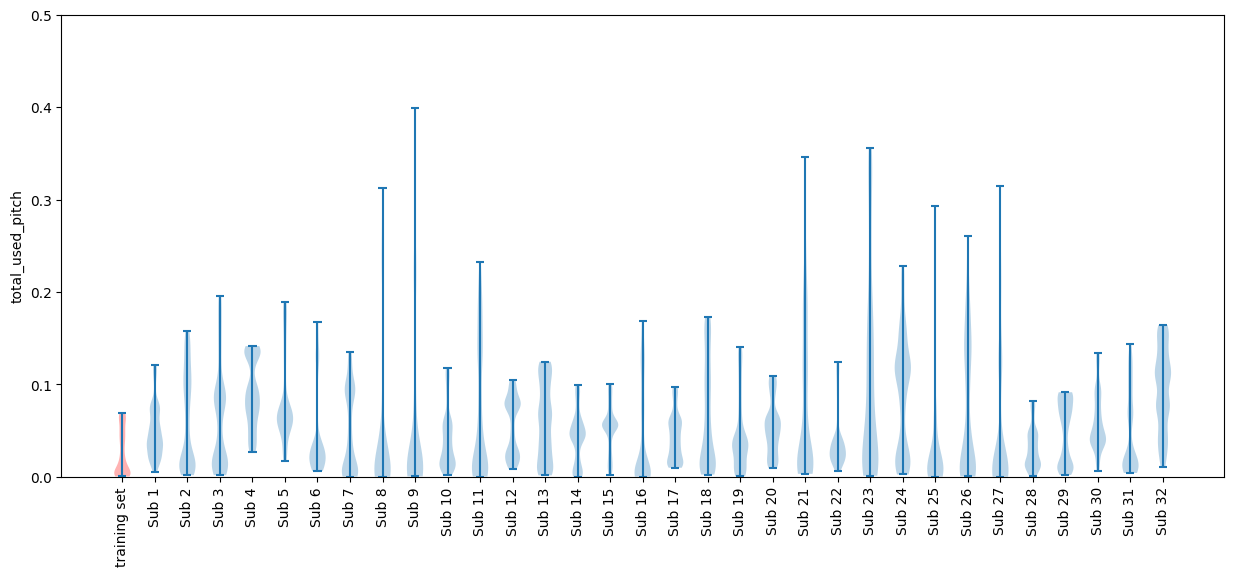

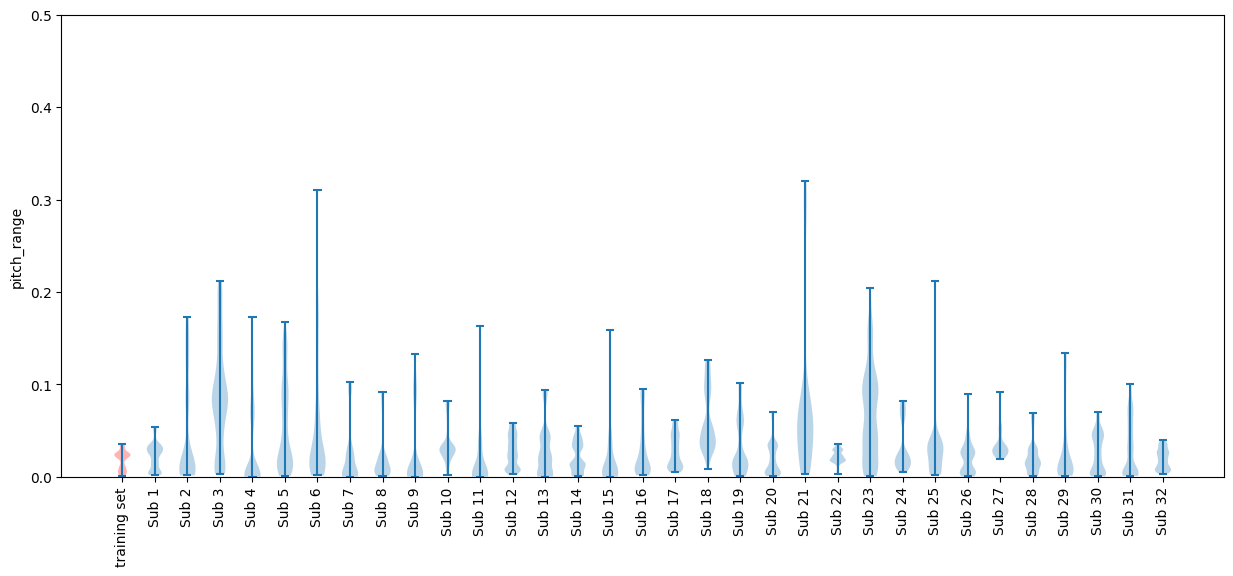

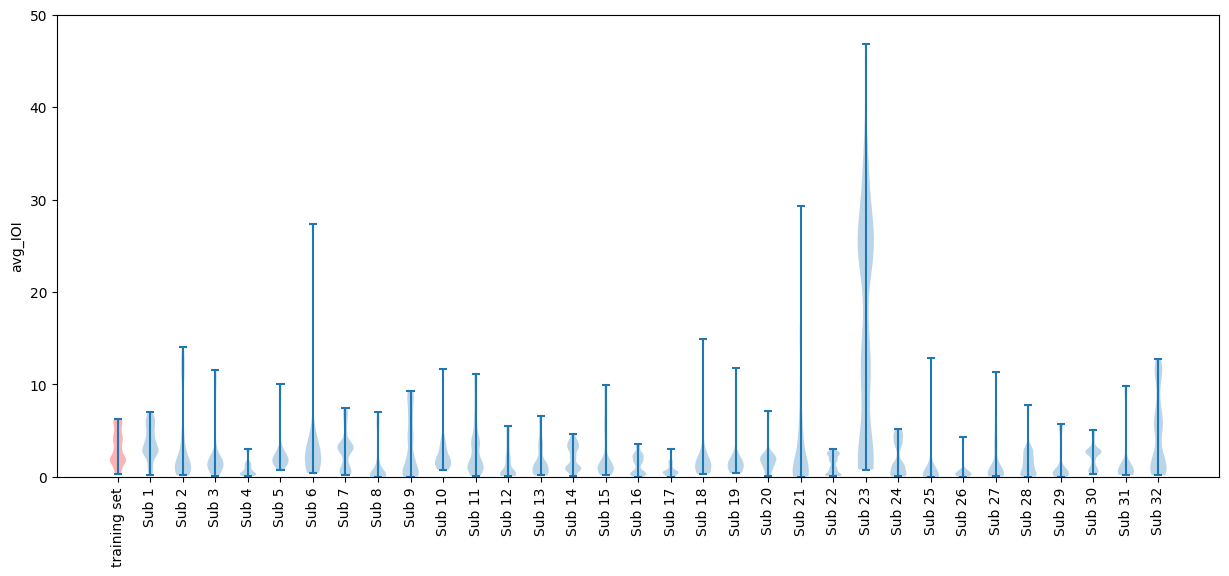

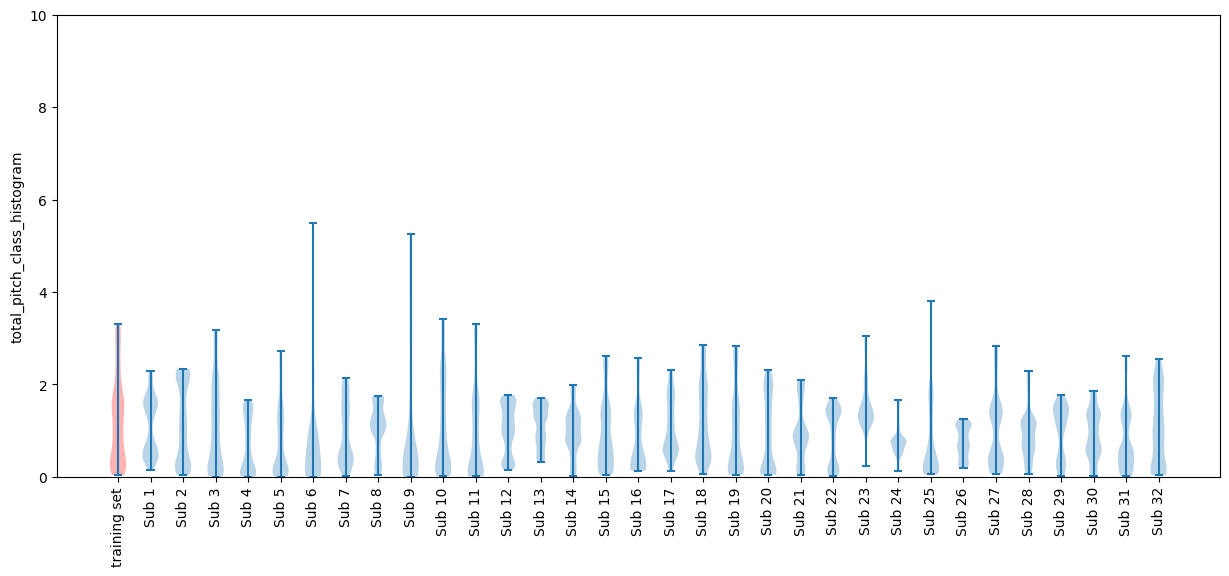

In [51]:
fold = 1
for feature in range(4):
  pdfs_list = list(itra_set_pdfs[:,fold,feature,:])
  pdfs_list.insert(0, training_pdfs[feature])

  if feature == 2:
    y_sup_lim = 50
  elif feature == 3:
    y_sup_lim = 10
  else:
    y_sup_lim = 0.5
  # figure
  fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15, 6), sharey=True)

  ax1.set_ylabel(metrics_list[feature])
  ax1.set_ylim(0, y_sup_lim)

  # Violin plot para los datos (pdfs_list)
  parts = ax1.violinplot(pdfs_list)

  # Modificar el color del primer violin
  parts['bodies'][0].set_facecolor('red')  # Puedes establecer el color que desees

  # Etiquetas para el eje x
  labels = [f'Sub {i+1}' for i in range(32)]
  labels.insert(0, 'training set')

  ax1.set_xticks(np.arange(1, len(labels) + 1))
  ax1.set_xticklabels(labels)
  plt.xticks(rotation=90)
    
  # Save the figure
  filename = f"feature_{metrics_list[feature]}_fold_{fold}.png"  # You can choose your own naming convention
  plt.savefig(filename, bbox_inches='tight')
  plt.show()

In [55]:
from scipy.stats import entropy, gaussian_kde
from scipy.integrate import quad

# Sujeto peor y mejor
worst_subject = 16
best_subject = 20

# Lista de métricas
metrics_list = ['PC', 'PR', 'IOI', 'PCH']
folds = 5

def overlap_area(A, B, is_pdf=False, num_sample=1000):
    """
    Calculate the overlap area between two distributions or PDFs.
    
    Parameters:
    - A: array-like or pre-computed PDF.
    - B: array-like or pre-computed PDF.
    - is_pdf: bool, indicates if A and B are already PDFs.
    - num_sample: int, number of samples for KDE if A and B are not PDFs.
    
    Returns:
    - Overlap area between the two distributions or PDFs (between 0 and 1).
    """
    if is_pdf:
        # Normalize inputs if they're not normalized already
        x_values = np.linspace(0, len(A) - 1, len(A))  # Assume uniform spacing
        area_A = np.trapz(A, x_values)
        area_B = np.trapz(B, x_values)
        normalized_A = A / area_A
        normalized_B = B / area_B

        return np.trapz(np.minimum(normalized_A, normalized_B), x_values)
    else:
        # Compute PDFs using Gaussian KDE
        pdf_A = stats.gaussian_kde(A)
        pdf_B = stats.gaussian_kde(B)

        # Define the range for integration
        lower_bound = min(np.min(A), np.min(B))
        upper_bound = max(np.max(A), np.max(B))

        # Integrate the minimum of the two PDFs
        result, _ = quad(lambda x: min(pdf_A(x), pdf_B(x)), lower_bound, upper_bound)
        return result

# Función para calcular la divergencia KL
def kl_divergence(p, q):
    return entropy(p, q)

# Función para calcular estadísticas (media y desviación estándar)
def calculate_statistics(values):
    return np.mean(values), np.std(values)

# Función para generar las tablas
def generate_stats_table():
    data_train_vs_train = []
    data_train_vs_worst = []
    data_train_vs_best = []
    
    for feature_idx, feature_name in enumerate(metrics_list):
        # Inicializamos listas para almacenar las métricas por fold
        kl_tt_list, overlap_tt_list = [], []
        kl_tw_list, overlap_tw_list = [], []
        kl_tb_list, overlap_tb_list = [], []
        means_train_list, std_train_list = [], []
        means_worst_list, std_worst_list = [], []
        means_best_list, std_best_list = [], []
        
        for fold in range(folds):
            # Datos para el peor y mejor sujeto
            data_generated_worst = itra_set_pdfs[worst_subject, fold, feature_idx, :]
            data_generated_best = itra_set_pdfs[best_subject, fold, feature_idx, :]
            data_training = training_pdfs[feature_idx]

            # Calcular KL y área superpuesta para cada comparación
            kl_tt = kl_divergence(data_training, data_training)
            overlap_tt = overlap_area(data_training, data_training, is_pdf=True)

            kl_tbw = kl_divergence(data_training, data_generated_worst)
            overlap_tbw = overlap_area(data_training, data_generated_worst, is_pdf=True)

            kl_tbb = kl_divergence(data_training, data_generated_best)
            overlap_tbb = overlap_area(data_training, data_generated_best, is_pdf=True)

            # Guardamos los resultados de cada fold en las listas correspondientes
            kl_tt_list.append(kl_tt)
            overlap_tt_list.append(overlap_tt)
            kl_tw_list.append(kl_tbw)
            overlap_tw_list.append(overlap_tbw)
            kl_tb_list.append(kl_tbb)
            overlap_tb_list.append(overlap_tbb)

            # Calcular estadísticas (media y desviación estándar) para cada fold
            mean_train, std_train = calculate_statistics(data_training)
            mean_worst, std_worst = calculate_statistics(data_generated_worst)
            mean_best, std_best = calculate_statistics(data_generated_best)

            # Guardar medias y desviaciones por fold
            means_train_list.append(mean_train)
            std_train_list.append(std_train)
            means_worst_list.append(mean_worst)
            std_worst_list.append(std_worst)
            means_best_list.append(mean_best)
            std_best_list.append(std_best)

        # Calcular el promedio de KL y Overlap Area
        mean_kl_tt = np.mean(kl_tt_list)
        mean_overlap_tt = np.mean(overlap_tt_list)
        
        mean_kl_tw = np.mean(kl_tw_list)
        mean_overlap_tw = np.mean(overlap_tw_list)
        
        mean_kl_tb = np.mean(kl_tb_list)
        mean_overlap_tb = np.mean(overlap_tb_list)

        # Calcular el promedio de medias y desviaciones estándar de los 5 folds
        final_mean_train = np.mean(means_train_list)
        final_std_train = np.mean(std_train_list)

        final_mean_worst = np.mean(means_worst_list)
        final_std_worst = np.mean(std_worst_list)

        final_mean_best = np.mean(means_best_list)
        final_std_best = np.mean(std_best_list)

        # Almacenar los resultados en las tablas
        data_train_vs_train.append([feature_name, final_mean_train, final_std_train, mean_kl_tt, mean_overlap_tt])
        data_train_vs_worst.append([feature_name, final_mean_worst, final_std_worst, mean_kl_tw, mean_overlap_tw])
        data_train_vs_best.append([feature_name, final_mean_best, final_std_best, mean_kl_tb, mean_overlap_tb])

    # Crear DataFrames para las tres tablas
    columns = ['Metric', 'Mean', 'Mean Std Dev', 'Mean KL', 'Mean Overlap']
    
    table_train_vs_train = pd.DataFrame(data_train_vs_train, columns=columns)
    table_train_vs_worst = pd.DataFrame(data_train_vs_worst, columns=columns)
    table_train_vs_best = pd.DataFrame(data_train_vs_best, columns=columns)

    return table_train_vs_train, table_train_vs_worst, table_train_vs_best

# Asumiendo que ya tienes definidas las matrices itra_set_pdfs y training_pdfs, 
# puedes generar las tablas con el siguiente código:

table_train_vs_train, table_train_vs_worst, table_train_vs_best = generate_stats_table()

# Mostrar los resultados
print("Table: Training vs Training")
print(table_train_vs_train)

print("\nTable: Training vs Worst Subject")
print(table_train_vs_worst)

print("\nTable: Training vs Best Subject")
print(table_train_vs_best)

Table: Training vs Training
  Metric      Mean  Mean Std Dev  Mean KL  Mean Overlap
0     PC  0.026631      0.024230      0.0           1.0
1     PR  0.018504      0.010019      0.0           1.0
2    IOI  3.184134      1.784040      0.0           1.0
3    PCH  1.269862      0.963146      0.0           1.0

Table: Training vs Worst Subject
  Metric      Mean  Mean Std Dev   Mean KL  Mean Overlap
0     PC  0.042617      0.024720  0.446502      0.635858
1     PR  0.026233      0.017207  0.207528      0.776660
2    IOI  0.786089      0.728793  0.228678      0.751985
3    PCH  1.101409      0.637367  0.236998      0.713150

Table: Training vs Best Subject
  Metric      Mean  Mean Std Dev   Mean KL  Mean Overlap
0     PC  0.099128      0.104696  0.082781      0.841051
1     PR  0.082860      0.074627  0.249435      0.721505
2    IOI  4.960142      6.567809  0.516072      0.676681
3    PCH  0.994342      0.588620  0.965759      0.486928


In [53]:
def overlap_area(A, B, is_pdf=False, num_sample=1000):
    if is_pdf:
        # Normalize inputs if they're not normalized already
        x_values = np.linspace(0, len(A) - 1, len(A))  # Assume uniform spacing
        area_A = np.trapz(A, x_values)
        area_B = np.trapz(B, x_values)
        normalized_A = A / area_A
        normalized_B = B / area_B

        return np.trapz(np.minimum(normalized_A, normalized_B), x_values)
    else:
        # Compute PDFs using Gaussian KDE
        pdf_A = stats.gaussian_kde(A)
        pdf_B = stats.gaussian_kde(B)

        # Define the range for integration
        lower_bound = min(np.min(A), np.min(B))
        upper_bound = max(np.max(A), np.max(B))
        x_values = np.linspace(lower_bound, upper_bound, num_sample)

        # Evaluate PDFs and normalize
        pdf_A_values = pdf_A(x_values)
        pdf_B_values = pdf_B(x_values)
        area_A = np.trapz(pdf_A_values, x_values)
        area_B = np.trapz(pdf_B_values, x_values)

        normalized_pdf_A = pdf_A_values / area_A
        normalized_pdf_B = pdf_B_values / area_B

        # Compute overlap area
        return np.trapz(np.minimum(normalized_pdf_A, normalized_pdf_B), x_values)

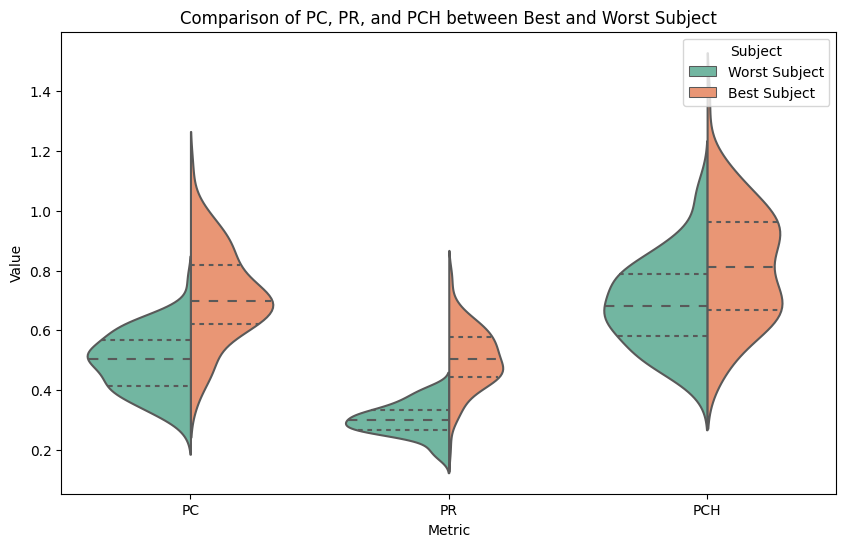

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ejemplo para las métricas PC, PR, PCH (sustituyelos por tus datos reales)
worst_subject_data = {
    'PC': np.random.normal(0.5, 0.1, 100),
    'PR': np.random.normal(0.3, 0.05, 100),
    'PCH': np.random.normal(0.7, 0.15, 100)
}

best_subject_data = {
    'PC': np.random.normal(0.7, 0.15, 100),
    'PR': np.random.normal(0.5, 0.1, 100),
    'PCH': np.random.normal(0.8, 0.2, 100)
}

# Crear el DataFrame para Seaborn
data = []
for metric in ['PC', 'PR', 'PCH']:
    for value in worst_subject_data[metric]:
        data.append([metric, value, 'Worst Subject'])
    for value in best_subject_data[metric]:
        data.append([metric, value, 'Best Subject'])

import pandas as pd
df = pd.DataFrame(data, columns=['Metric', 'Value', 'Subject'])

# Configurar la gráfica de violines
plt.figure(figsize=(10, 6))
sns.violinplot(x='Metric', y='Value', hue='Subject', data=df, split=True, inner='quartile', palette='Set2')
plt.title("Comparison of PC, PR, and PCH between Best and Worst Subject")
plt.show()


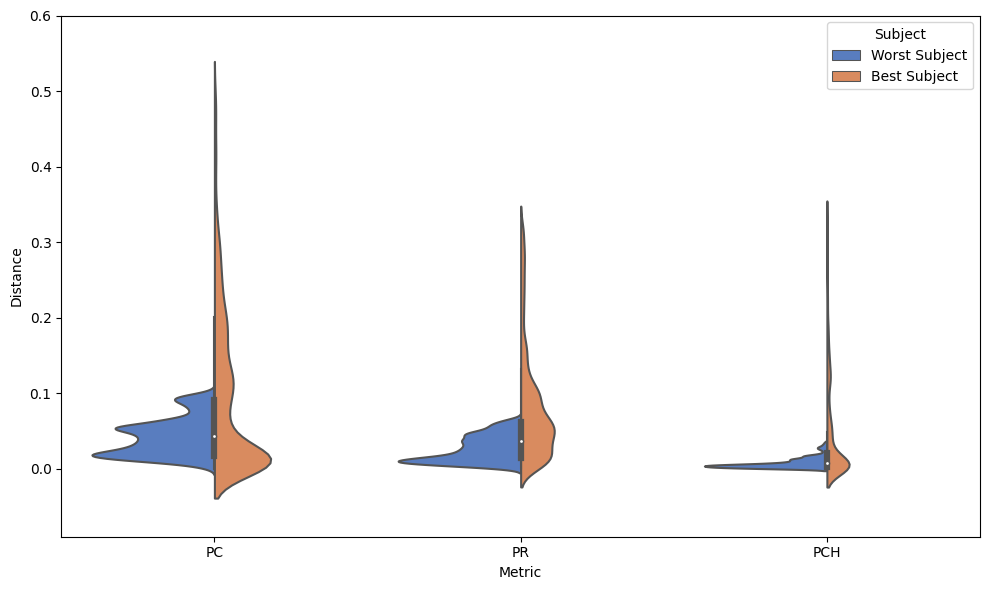

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Métricas
metrics_list = ['PC', 'PR', 'PCH']
worst_subject = 16
best_subject = 20
folds = 5

# Función para normalizar las métricas (ajustar la escala)
def normalize_metric(values, scale_factor):
    return values / scale_factor

# Función para preparar los datos para la gráfica
def prepare_violin_data():
    data = []
    # Factores de escala para que las métricas sean comparables
    scale_factors = {'PC': 1, 'PR': 1, 'PCH': 100}  # Ajustar PCH para que la escala sea más manejable

    for feature_idx, feature_name in enumerate(metrics_list):
        for fold in range(folds):
            # Datos del peor y mejor sujeto
            data_worst = itra_set_pdfs[worst_subject, fold, feature_idx, :]
            data_best = itra_set_pdfs[best_subject, fold, feature_idx, :]

            # Normalizamos cada métrica según su escala
            data_worst = normalize_metric(data_worst, scale_factors[feature_name])
            data_best = normalize_metric(data_best, scale_factors[feature_name])

            # Apilamos los datos con etiquetas de sujetos y métricas
            for val in data_worst:
                data.append([feature_name, 'Worst Subject', val])
            for val in data_best:
                data.append([feature_name, 'Best Subject', val])

    # Convertimos a DataFrame para trabajar con seaborn
    df = pd.DataFrame(data, columns=['Metric', 'Subject', 'Value'])
    return df

# Preparar los datos
df = prepare_violin_data()

# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.violinplot(x='Metric', y='Value', hue='Subject', data=df, split=True, palette="muted")

# Ajustes del gráfico
#plt.title("Violin Plots of PC, PR, PCH Metrics: Best vs Worst Subject")
plt.xlabel("Metric")
plt.ylabel("Distance")

# Ajustar los límites del eje y
plt.ylim(-0.09, 0.6)  # Ajustar el valor según tus datos, o bien utilizar plt.ylim(auto=True)

# Mostrar leyenda y gráfico
plt.legend(title="Subject")
plt.tight_layout()

# Mostrar la gráfica
plt.savefig("Violinfig")
plt.show()


In [64]:
# Inicializamos un diccionario para almacenar las medias y desviaciones estándar
statistics = {
    'total_used_pitch': {'mean': [], 'std': []},
    'pitch_range': {'mean': [], 'std': []},
    'avg_IOI': {'mean': [], 'std': []},
    'total_pitch_class_histogram': {'mean': [], 'std': []}
}

# Recorremos cada característica y calculamos la media y desviación para los 5 folds
for feature in range(4):
    feature_name = list(statistics.keys())[feature]  # Obtener el nombre de la característica
    for fold in range(5):  # Para cada fold (del 0 al 4)
        # Obtener los datos para la característica actual y el fold
        current_data = itra_set_pdfs[:, fold, feature, :]
        
        # Calcular la media y desviación estándar para este fold
        mean_val = np.mean(current_data)
        std_val = np.std(current_data)
        
        # Guardar los resultados en el diccionario
        statistics[feature_name]['mean'].append(mean_val)
        statistics[feature_name]['std'].append(std_val)

# Mostrar las medias y desviaciones estándar calculadas
for feature_name, stats in statistics.items():
    print(f"Feature: {feature_name}")
    for fold in range(5):
        print(f"  Fold {fold+1}: Mean = {stats['mean'][fold]:.4f}, Std = {stats['std'][fold]:.4f}")



Feature: total_used_pitch
  Fold 1: Mean = 0.0597, Std = 0.0562
  Fold 2: Mean = 0.0608, Std = 0.0589
  Fold 3: Mean = 0.0639, Std = 0.0651
  Fold 4: Mean = 0.0619, Std = 0.0664
  Fold 5: Mean = 0.0626, Std = 0.0611
Feature: pitch_range
  Fold 1: Mean = 0.0378, Std = 0.0420
  Fold 2: Mean = 0.0363, Std = 0.0414
  Fold 3: Mean = 0.0385, Std = 0.0441
  Fold 4: Mean = 0.0383, Std = 0.0484
  Fold 5: Mean = 0.0376, Std = 0.0444
Feature: avg_IOI
  Fold 1: Mean = 2.8135, Std = 4.0979
  Fold 2: Mean = 2.9526, Std = 4.5600
  Fold 3: Mean = 2.7168, Std = 4.0187
  Fold 4: Mean = 2.7336, Std = 5.0111
  Fold 5: Mean = 2.9739, Std = 4.5991
Feature: total_pitch_class_histogram
  Fold 1: Mean = 1.0043, Std = 0.8147
  Fold 2: Mean = 1.0064, Std = 0.7909
  Fold 3: Mean = 1.0157, Std = 0.8155
  Fold 4: Mean = 1.0141, Std = 0.8534
  Fold 5: Mean = 1.0203, Std = 0.8130


# **WORS subject**

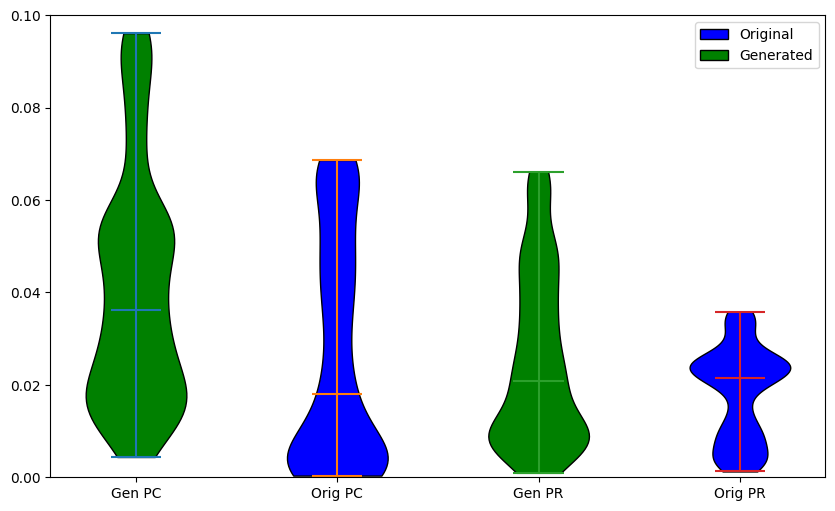

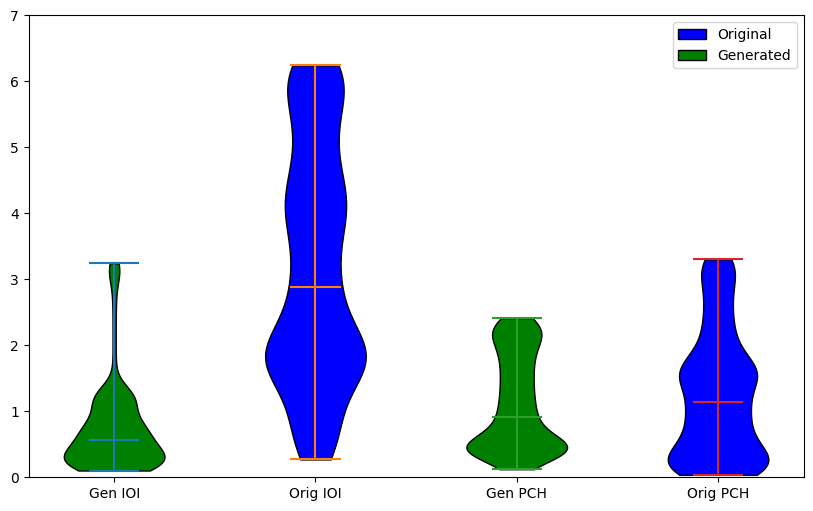

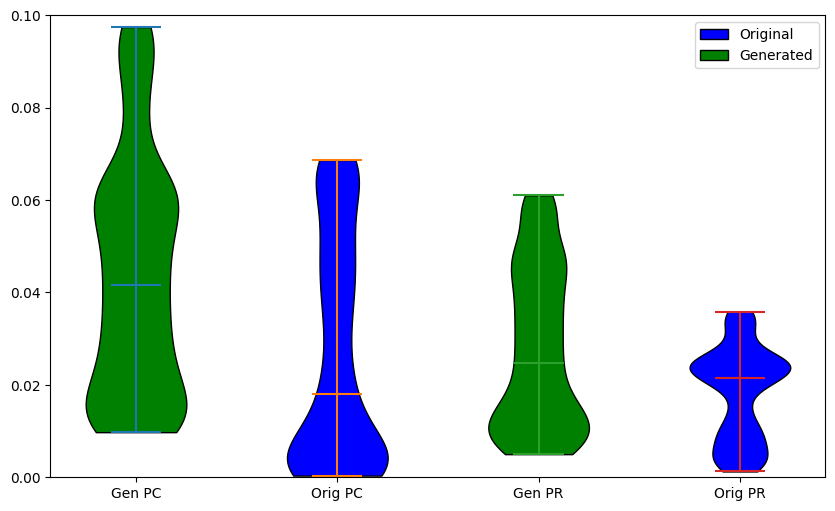

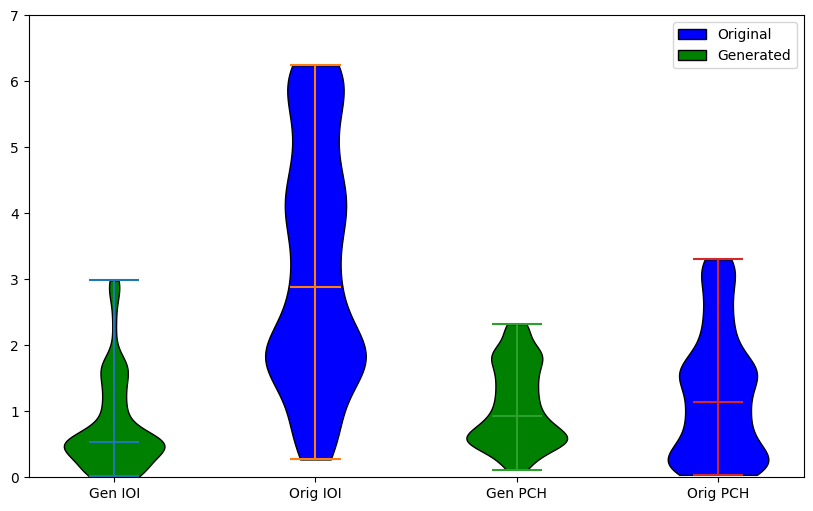

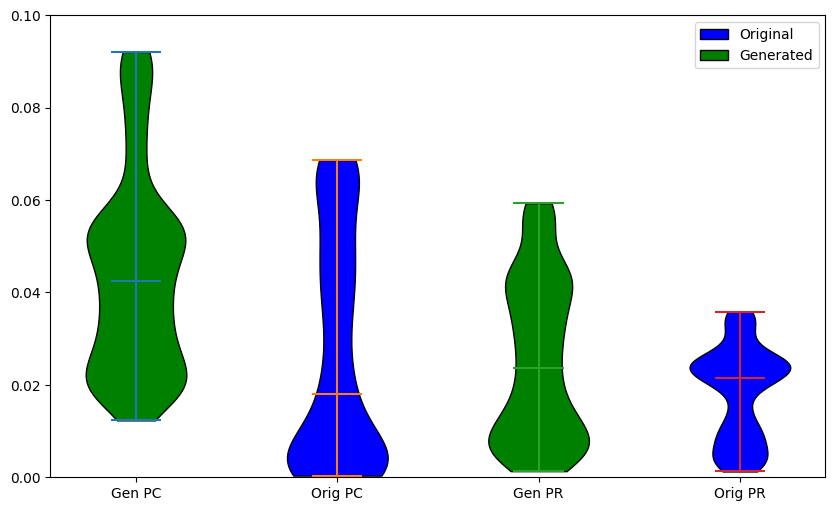

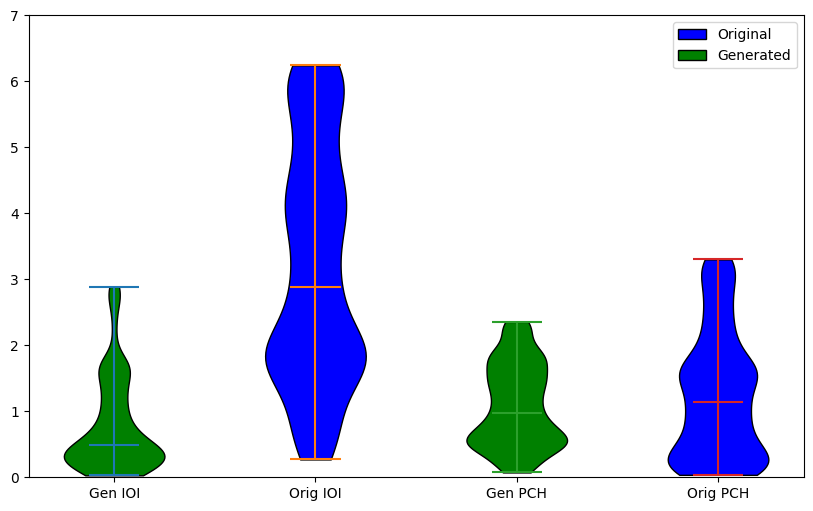

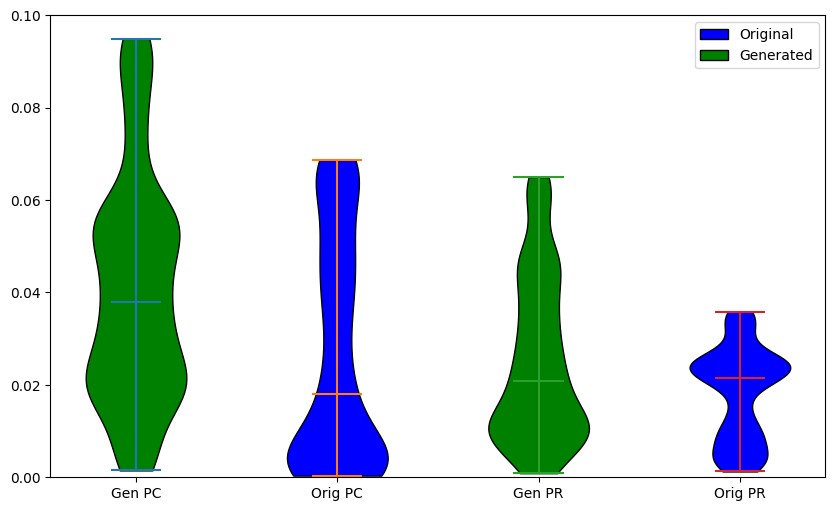

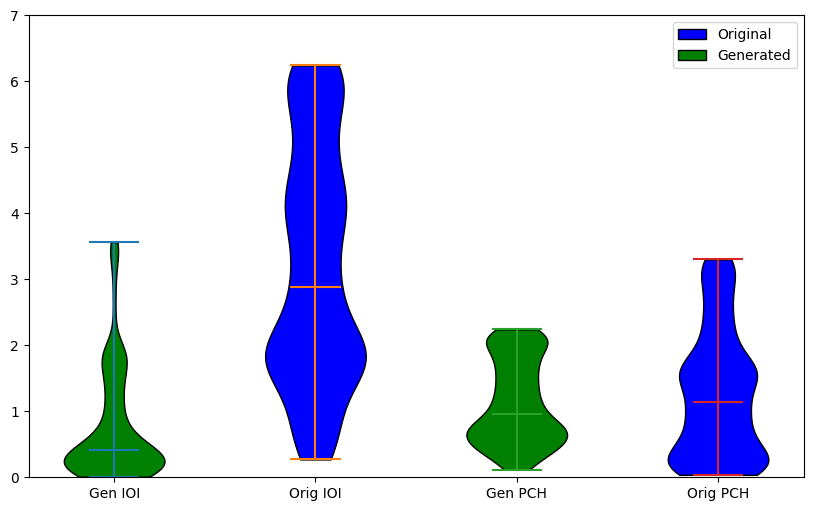

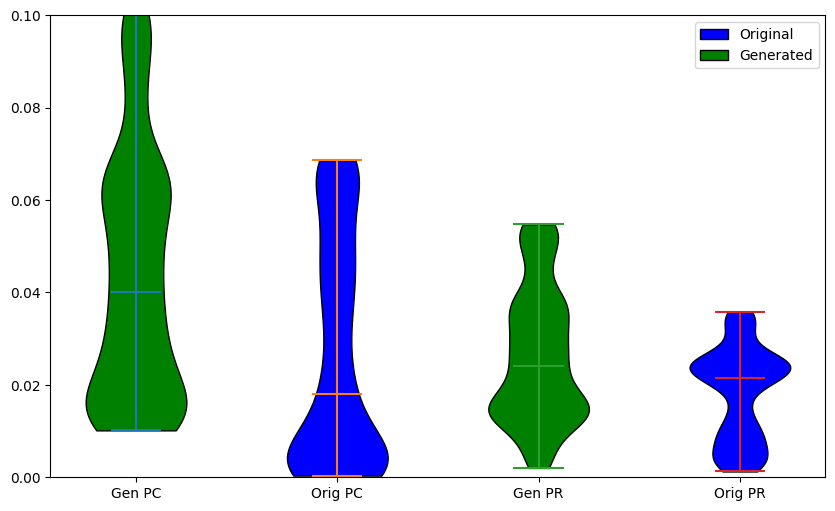

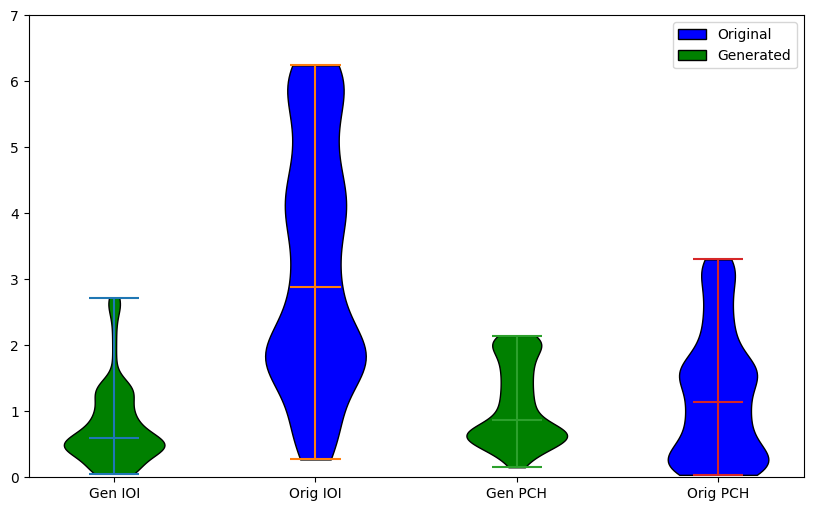

In [65]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Sujeto de interés
worst_subject = 16  # Índice del peor sujeto
colors = ['blue', 'green']
metrics_list = ['PC', 'PR', 'IOI', 'PCH']

# Función para crear gráficos de violines para el peor sujeto
def create_violin_plots_worst_subject(output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for fold in range(5):
        # Gráfico para PC y PR
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

        for i, feature in enumerate([0, 1]):  # PC y PR
            data_generated = itra_set_pdfs[worst_subject, fold, feature, :]
            data_original = training_pdfs[feature]

            # Posiciones alternadas
            positions_generated = [i * 2 + 1]
            positions_original = [i * 2 + 2]

            # Graficar violines
            parts_generated = ax.violinplot(data_generated, positions=positions_generated, showmeans=False, showmedians=True)
            parts_original = ax.violinplot(data_original, positions=positions_original, showmeans=False, showmedians=True)

            # Ajustar colores
            for pc in parts_generated['bodies']:
                pc.set_facecolor(colors[1])
                pc.set_edgecolor('black')
                pc.set_alpha(1)

            for pc in parts_original['bodies']:
                pc.set_facecolor(colors[0])
                pc.set_edgecolor('black')
                pc.set_alpha(1)

            # Ajuste de límites del eje Y
            ax.set_ylim(0, 0.1)  # Límites específicos para PC y PR

        # Etiquetas para el eje x
        labels = ['Gen PC', 'Orig PC', 'Gen PR', 'Orig PR']
        ax.set_xticks(np.arange(1, 5))
        ax.set_xticklabels(labels)
        plt.xticks(rotation=0)

        # Leyenda
        legend_elements = [Patch(facecolor=colors[0], edgecolor='black', label='Original'),
                           Patch(facecolor=colors[1], edgecolor='black', label='Generated')]
        ax.legend(handles=legend_elements, loc='upper right')

        # Guardar la figura
        plt.savefig(os.path.join(output_dir, f"worst_subject_PC_PR_fold_{fold + 1}.png"), bbox_inches='tight')
        plt.show()

        # Gráfico para IOI y PCH
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

        for i, feature in enumerate([2, 3]):  # IOI y PCH
            data_generated = itra_set_pdfs[worst_subject, fold, feature, :]
            data_original = training_pdfs[feature]

            # Posiciones alternadas
            positions_generated = [i * 2 + 1]
            positions_original = [i * 2 + 2]

            # Graficar violines
            parts_generated = ax.violinplot(data_generated, positions=positions_generated, showmeans=False, showmedians=True)
            parts_original = ax.violinplot(data_original, positions=positions_original, showmeans=False, showmedians=True)

            # Ajustar colores
            for pc in parts_generated['bodies']:
                pc.set_facecolor(colors[1])
                pc.set_edgecolor('black')
                pc.set_alpha(1)

            for pc in parts_original['bodies']:
                pc.set_facecolor(colors[0])
                pc.set_edgecolor('black')
                pc.set_alpha(1)

            # Ajuste de límites del eje Y
            if feature == 2:  # IOI
                ax.set_ylim(0, 7)
            else:  # PCH
                ax.set_ylim(0, 7)

        # Etiquetas para el eje x
        labels = ['Gen IOI', 'Orig IOI', 'Gen PCH', 'Orig PCH']
        ax.set_xticks(np.arange(1, 5))
        ax.set_xticklabels(labels)
        plt.xticks(rotation=0)

        # Leyenda
        ax.legend(handles=legend_elements, loc='upper right')

        # Guardar la figura
        plt.savefig(os.path.join(output_dir, f"worst_subject_IOI_PCH_fold_{fold + 1}.png"), bbox_inches='tight')
        plt.show()

# Directorio de salida
output_dir = 'graficas_worst_subject'

# Crear gráficos para el peor sujeto (17)
create_violin_plots_worst_subject(output_dir)


# **Best subject**

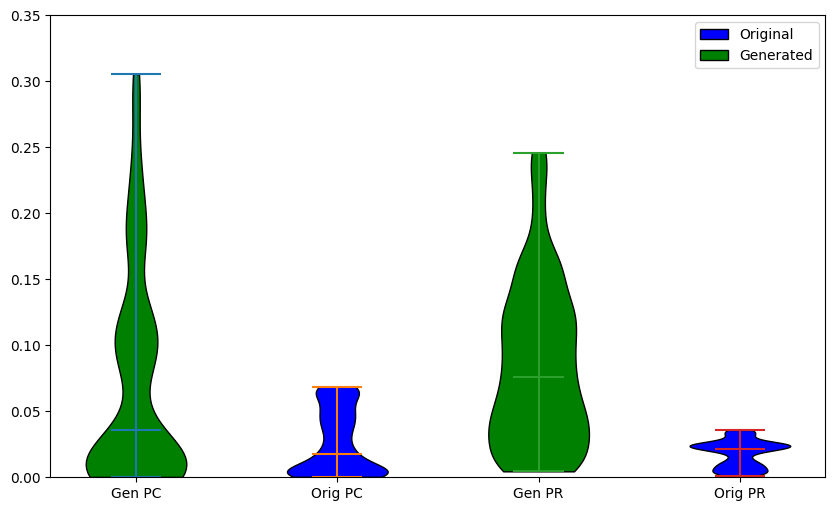

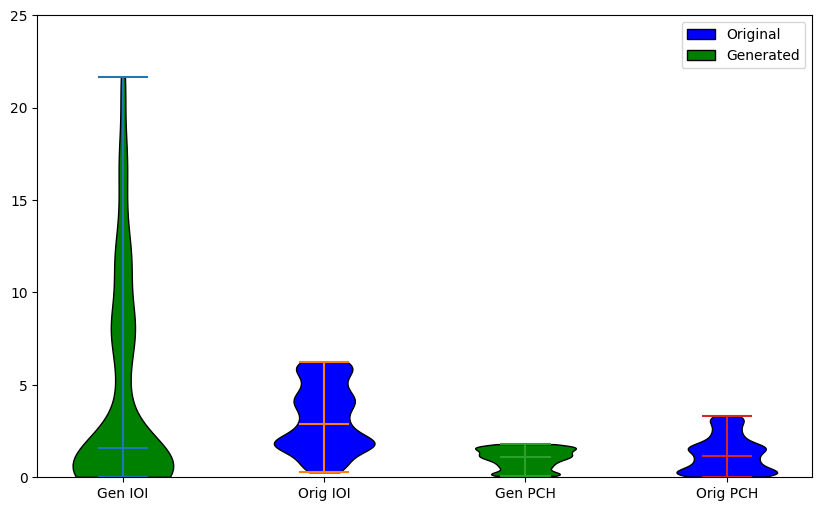

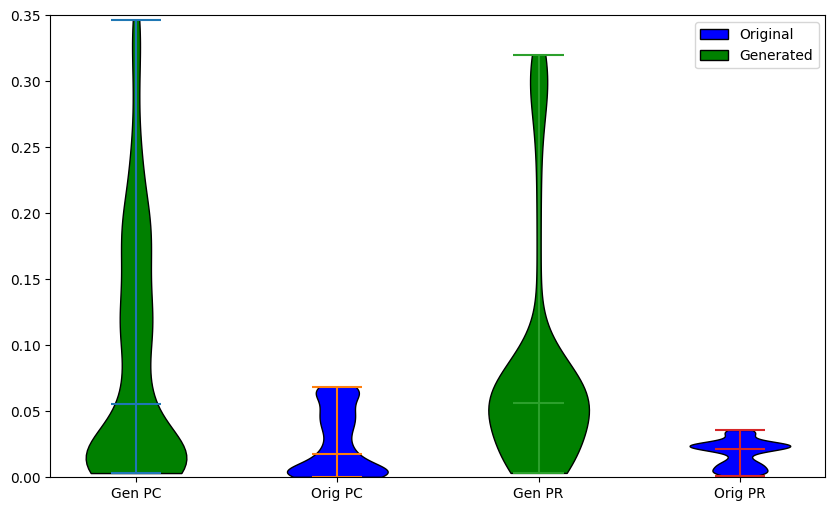

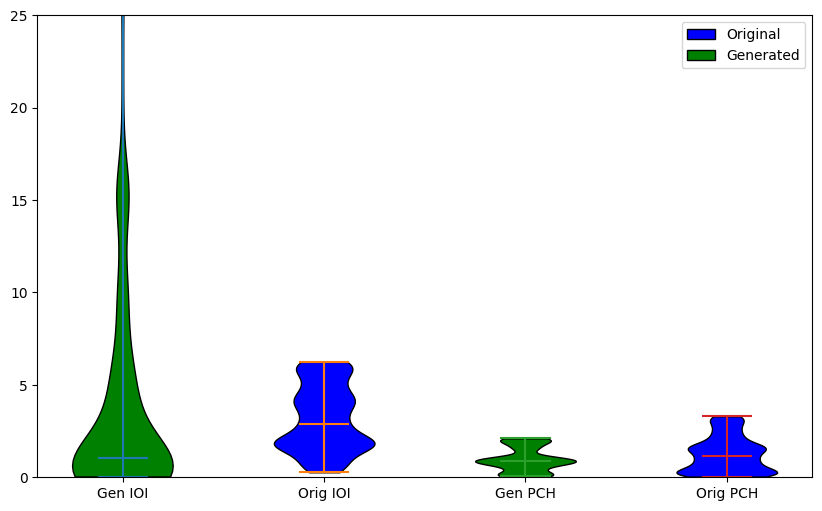

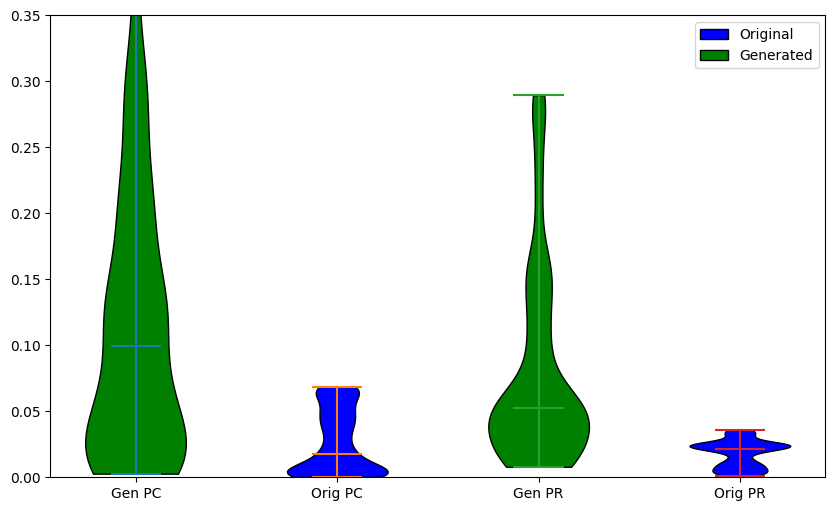

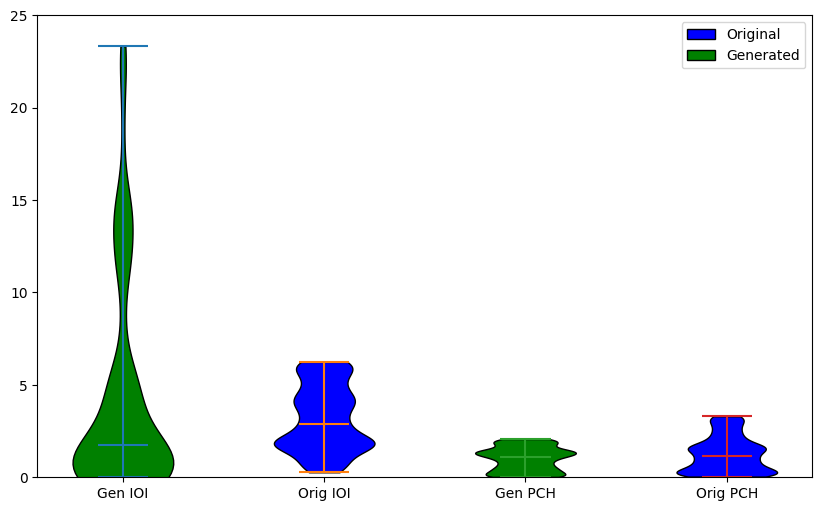

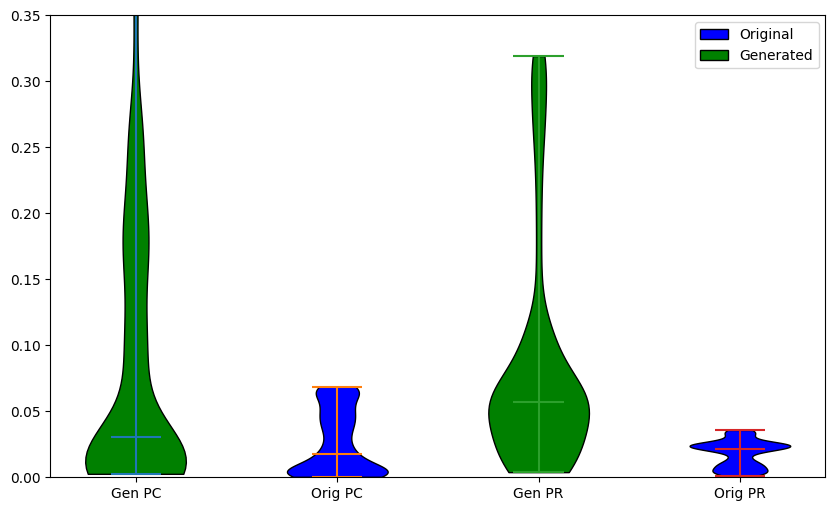

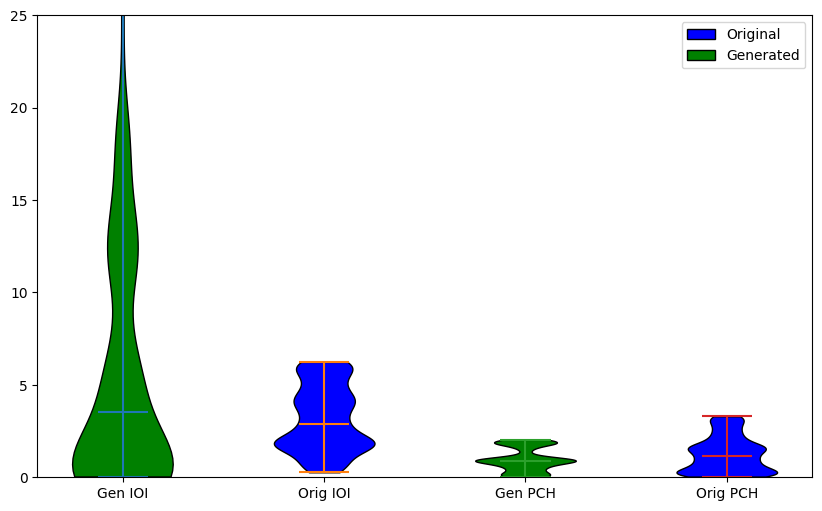

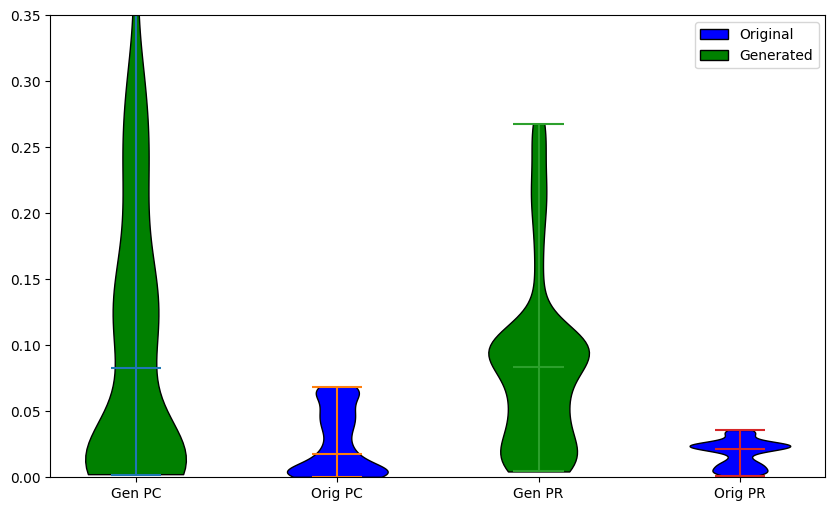

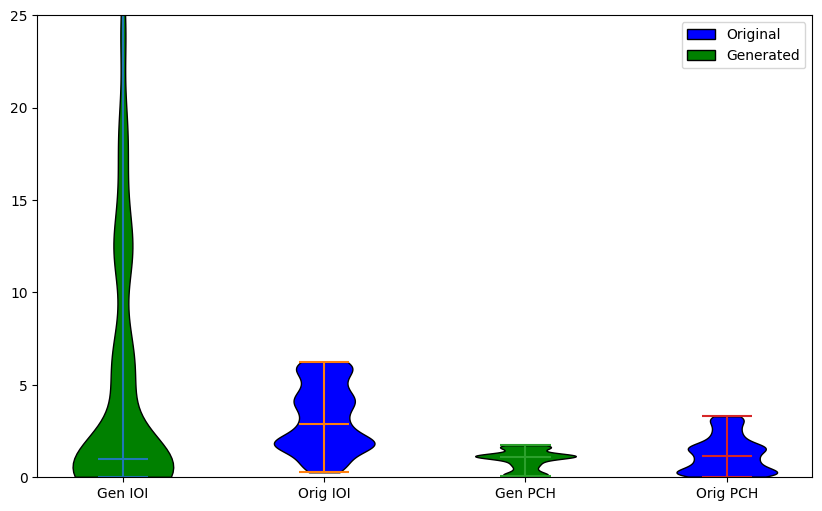

In [66]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Sujeto de interés
best_subject = 20  # Índice del mejor sujeto
colors = ['blue', 'green']
metrics_list = ['PC', 'PR', 'IOI', 'PCH']

# Función para crear gráficos de violines para el mejor sujeto
def create_violin_plots_best_subject(output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for fold in range(5):
        # Gráfico para PC y PR
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

        for i, feature in enumerate([0, 1]):  # PC y PR
            data_generated = itra_set_pdfs[best_subject, fold, feature, :]
            data_original = training_pdfs[feature]

            # Posiciones alternadas
            positions_generated = [i * 2 + 1]
            positions_original = [i * 2 + 2]

            # Graficar violines
            parts_generated = ax.violinplot(data_generated, positions=positions_generated, showmeans=False, showmedians=True)
            parts_original = ax.violinplot(data_original, positions=positions_original, showmeans=False, showmedians=True)

            # Ajustar colores
            for pc in parts_generated['bodies']:
                pc.set_facecolor(colors[1])
                pc.set_edgecolor('black')
                pc.set_alpha(1)

            for pc in parts_original['bodies']:
                pc.set_facecolor(colors[0])
                pc.set_edgecolor('black')
                pc.set_alpha(1)

            # Ajuste de límites del eje Y
            ax.set_ylim(0, 0.35)  # Límites específicos para PC y PR

        # Etiquetas para el eje x
        labels = ['Gen PC', 'Orig PC', 'Gen PR', 'Orig PR']
        ax.set_xticks(np.arange(1, 5))
        ax.set_xticklabels(labels)
        plt.xticks(rotation=0)

        # Leyenda
        legend_elements = [Patch(facecolor=colors[0], edgecolor='black', label='Original'),
                           Patch(facecolor=colors[1], edgecolor='black', label='Generated')]
        ax.legend(handles=legend_elements, loc='upper right')

        # Guardar la figura
        plt.savefig(os.path.join(output_dir, f"best_subject_PC_PR_fold_{fold + 1}.png"), bbox_inches='tight')
        plt.show()

        # Gráfico para IOI y PCH
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

        for i, feature in enumerate([2, 3]):  # IOI y PCH
            data_generated = itra_set_pdfs[best_subject, fold, feature, :]
            data_original = training_pdfs[feature]

            # Posiciones alternadas
            positions_generated = [i * 2 + 1]
            positions_original = [i * 2 + 2]

            # Graficar violines
            parts_generated = ax.violinplot(data_generated, positions=positions_generated, showmeans=False, showmedians=True)
            parts_original = ax.violinplot(data_original, positions=positions_original, showmeans=False, showmedians=True)

            # Ajustar colores
            for pc in parts_generated['bodies']:
                pc.set_facecolor(colors[1])
                pc.set_edgecolor('black')
                pc.set_alpha(1)

            for pc in parts_original['bodies']:
                pc.set_facecolor(colors[0])
                pc.set_edgecolor('black')
                pc.set_alpha(1)

            # Ajuste de límites del eje Y
            if feature == 2:  # IOI
                ax.set_ylim(0, 25)
            else:  # PCH
                ax.set_ylim(0, 25)

        # Etiquetas para el eje x
        labels = ['Gen IOI', 'Orig IOI', 'Gen PCH', 'Orig PCH']
        ax.set_xticks(np.arange(1, 5))
        ax.set_xticklabels(labels)
        plt.xticks(rotation=0)

        # Leyenda
        ax.legend(handles=legend_elements, loc='upper right')

        # Guardar la figura
        plt.savefig(os.path.join(output_dir, f"best_subject_IOI_PCH_fold_{fold + 1}.png"), bbox_inches='tight')
        plt.show()

# Directorio de salida
output_dir = 'graficas_best_subject'

# Crear gráficos para el mejor sujeto (21)
create_violin_plots_best_subject(output_dir)


# KL & OA

In [67]:
print("Number of folds in training_pdfs:", len(training_pdfs))
print("Number of folds in itra_set_pdfs:", len(itra_set_pdfs))
print("Number of folds in worst_subject:", len(itra_set_pdfs[worst_subject]))
print("Number of folds in best_subject:", len(itra_set_pdfs[best_subject]))


Number of folds in training_pdfs: 4
Number of folds in itra_set_pdfs: 32
Number of folds in worst_subject: 5
Number of folds in best_subject: 5


# Tabla completa

In [68]:
import numpy as np
import pandas as pd
from scipy.stats import entropy

# Sujeto peor y mejor
worst_subject = 16
best_subject = 20

# Lista de métricas
metrics_list = ['PC', 'PR', 'IOI', 'PCH']
folds = 5

# Función para calcular área superpuesta (Overlap Area)
def overlap_area(p, q):
    return np.sum(np.minimum(p, q))

# Función para calcular la divergencia KL
def kl_divergence(p, q):
    return entropy(p, q)

# Función para calcular estadísticas (media y desviación estándar)
def calculate_statistics(values):
    return np.mean(values), np.std(values)

# Función para generar las tablas
def generate_stats_table():
    data_train_vs_train = []
    data_train_vs_worst = []
    data_train_vs_best = []
    
    for feature_idx, feature_name in enumerate(metrics_list):
        # Inicializamos listas para almacenar las métricas por fold
        kl_tt_list, overlap_tt_list = [], []
        kl_tw_list, overlap_tw_list = [], []
        kl_tb_list, overlap_tb_list = [], []
        means_train_list, std_train_list = [], []
        means_worst_list, std_worst_list = [], []
        means_best_list, std_best_list = [], []
        
        for fold in range(folds):
            # Datos para el peor y mejor sujeto
            data_generated_worst = itra_set_pdfs[worst_subject, fold, feature_idx, :]
            data_generated_best = itra_set_pdfs[best_subject, fold, feature_idx, :]
            data_training = training_pdfs[feature_idx]

            # Calcular KL y área superpuesta para cada comparación
            kl_tt = kl_divergence(data_training, data_training)
            overlap_tt = overlap_area(data_training, data_training)

            kl_tbw = kl_divergence(data_training, data_generated_worst)
            overlap_tbw = overlap_area(data_training, data_generated_worst)

            kl_tbb = kl_divergence(data_training, data_generated_best)
            overlap_tbb = overlap_area(data_training, data_generated_best)

            # Guardamos los resultados de cada fold en las listas correspondientes
            kl_tt_list.append(kl_tt)
            overlap_tt_list.append(overlap_tt)
            kl_tw_list.append(kl_tbw)
            overlap_tw_list.append(overlap_tbw)
            kl_tb_list.append(kl_tbb)
            overlap_tb_list.append(overlap_tbb)

            # Calcular estadísticas (media y desviación estándar) para cada fold
            mean_train, std_train = calculate_statistics(data_training)
            mean_worst, std_worst = calculate_statistics(data_generated_worst)
            mean_best, std_best = calculate_statistics(data_generated_best)

            # Guardar medias y desviaciones por fold
            means_train_list.append(mean_train)
            std_train_list.append(std_train)
            means_worst_list.append(mean_worst)
            std_worst_list.append(std_worst)
            means_best_list.append(mean_best)
            std_best_list.append(std_best)

        # Calcular el promedio de KL y Overlap Area
        mean_kl_tt = np.mean(kl_tt_list)
        mean_overlap_tt = np.mean(overlap_tt_list)
        
        mean_kl_tw = np.mean(kl_tw_list)
        mean_overlap_tw = np.mean(overlap_tw_list)
        
        mean_kl_tb = np.mean(kl_tb_list)
        mean_overlap_tb = np.mean(overlap_tb_list)

        # Calcular el promedio de medias y desviaciones estándar de los 5 folds
        final_mean_train = np.mean(means_train_list)
        final_std_train = np.mean(std_train_list)

        final_mean_worst = np.mean(means_worst_list)
        final_std_worst = np.mean(std_worst_list)

        final_mean_best = np.mean(means_best_list)
        final_std_best = np.mean(std_best_list)

        # Almacenar los resultados en las tablas
        data_train_vs_train.append([feature_name, final_mean_train, final_std_train, mean_kl_tt, mean_overlap_tt])
        data_train_vs_worst.append([feature_name, final_mean_worst, final_std_worst, mean_kl_tw, mean_overlap_tw])
        data_train_vs_best.append([feature_name, final_mean_best, final_std_best, mean_kl_tb, mean_overlap_tb])

    # Crear DataFrames para las tres tablas
    columns = ['Metric', 'Mean', 'Mean Std Dev', 'Mean KL', 'Mean Overlap']
    
    table_train_vs_train = pd.DataFrame(data_train_vs_train, columns=columns)
    table_train_vs_worst = pd.DataFrame(data_train_vs_worst, columns=columns)
    table_train_vs_best = pd.DataFrame(data_train_vs_best, columns=columns)

    return table_train_vs_train, table_train_vs_worst, table_train_vs_best

# Generar y mostrar las tablas
table_train_vs_train, table_train_vs_worst, table_train_vs_best = generate_stats_table()

print("Table: Training vs Training")
print(table_train_vs_train)

print("\nTable: Training vs Worst Subject")
print(table_train_vs_worst)

print("\nTable: Training vs Best Subject")
print(table_train_vs_best)


Table: Training vs Training
  Metric      Mean  Mean Std Dev  Mean KL  Mean Overlap
0     PC  0.026631      0.024230      0.0     26.630829
1     PR  0.018504      0.010019      0.0     18.504068
2    IOI  3.184134      1.784040      0.0   3184.133860
3    PCH  1.269862      0.963146      0.0   1269.862058

Table: Training vs Worst Subject
  Metric      Mean  Mean Std Dev   Mean KL  Mean Overlap
0     PC  0.042617      0.024720  0.446502     21.661947
1     PR  0.026233      0.017207  0.207528     15.836435
2    IOI  0.786089      0.728793  0.228678    785.680712
3    PCH  1.101409      0.637367  0.236998    815.069075

Table: Training vs Best Subject
  Metric      Mean  Mean Std Dev   Mean KL  Mean Overlap
0     PC  0.099128      0.104696  0.082781     26.591296
1     PR  0.082860      0.074627  0.249435     18.240929
2    IOI  4.960142      6.567809  0.516072   2410.446118
3    PCH  0.994342      0.588620  0.965759    547.915191


In [69]:
import numpy as np
from scipy.stats import gaussian_kde
from scipy import integrate

def overlap_area(A, B):
    """
    Calcula el área de solapamiento entre dos conjuntos de datos usando KDE.
    
    Args:
        A (array-like): Datos del conjunto A.
        B (array-like): Datos del conjunto B.
        
    Returns:
        float: Área de solapamiento entre las PDFs estimadas.
    """
    # Estimación de las PDFs usando KDE
    pdf_A = gaussian_kde(A)
    pdf_B = gaussian_kde(B)
    
    # Determinar el rango de integración
    lower_bound = min(np.min(A), np.min(B))
    upper_bound = max(np.max(A), np.max(B))
    
    # Calcular el área de solapamiento mediante integración numérica
    overlap, _ = integrate.quad(
        lambda x: np.minimum(pdf_A(x), pdf_B(x)),
        lower_bound,
        upper_bound,
        limit=100,  # Número máximo de subdivisiones
        epsabs=1.49e-08,  # Precisión absoluta
        epsrel=1.49e-08   # Precisión relativa
    )
    
    return overlap

# Ejemplo de uso
A = np.random.normal(0, 1, 1000)  # Muestra del conjunto A
B = np.random.normal(0, 1, 1000)  # Muestra del conjunto B (idéntica)

# Calcular el área de solapamiento
overlap = overlap_area(A, B)
print(f"Área de solapamiento: {overlap:.4f}")


Área de solapamiento: 0.9654


/tmp/ipykernel_34/409854405.py:25: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  overlap, _ = integrate.quad(


In [70]:
# import matplotlib.pyplot as plt
# import numpy as np

# subjects_of_interest = [16, 20]  # Índices para los sujetos 17 y 21
# colors = ['blue', 'green']  # Colores para los datos originales y generados
# metrics_list = ['total_used_pitch', 'pitch_range', 'avg_IOI', 'total_pitch_class_histogram']

# for fold in range(5):
#     for feature in range(4):
#         fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
        
#         for subject in subjects_of_interest:
#             data_generated = itra_set_pdfs[subject, fold, feature, :]
#             data_original = training_pdfs[feature]
            
#             positions_generated = [subject + 1]
#             positions_original = [subject + 1.5]
            
#             parts_generated = ax.violinplot(data_generated, positions=positions_generated, showmeans=False, showmedians=True)
#             for pc in parts_generated['bodies']:
#                 pc.set_facecolor(colors[1])
#                 pc.set_edgecolor('black')
#                 pc.set_alpha(1)
            
#             parts_original = ax.violinplot(data_original, positions=positions_original, showmeans=False, showmedians=True)
#             for pc in parts_original['bodies']:
#                 pc.set_facecolor(colors[0])
#                 pc.set_edgecolor('black')
#                 pc.set_alpha(1)
        
#         ax.set_xticks([17, 21])
#         ax.set_xticklabels(['Worst Subject (17)', 'Best Subject (21)'])
#         ax.set_title(f'Fold {fold + 1}, Feature: {metrics_list[feature]}')
#         ax.set_ylabel('Density')
        
#         from matplotlib.patches import Patch
#         legend_elements = [Patch(facecolor=colors[0], edgecolor='black', label='Original'),
#                            Patch(facecolor=colors[1], edgecolor='black', label='Generated')]
#         ax.legend(handles=legend_elements, loc='upper right')

#         filename = f"fold_{fold}_feature_{metrics_list[feature]}.png"
#         plt.savefig(filename, bbox_inches='tight')
#         plt.show()


In [71]:
!mkdir /kaggle/working/paper/output_dir

mkdir: cannot create directory '/kaggle/working/paper/output_dir': No such file or directory


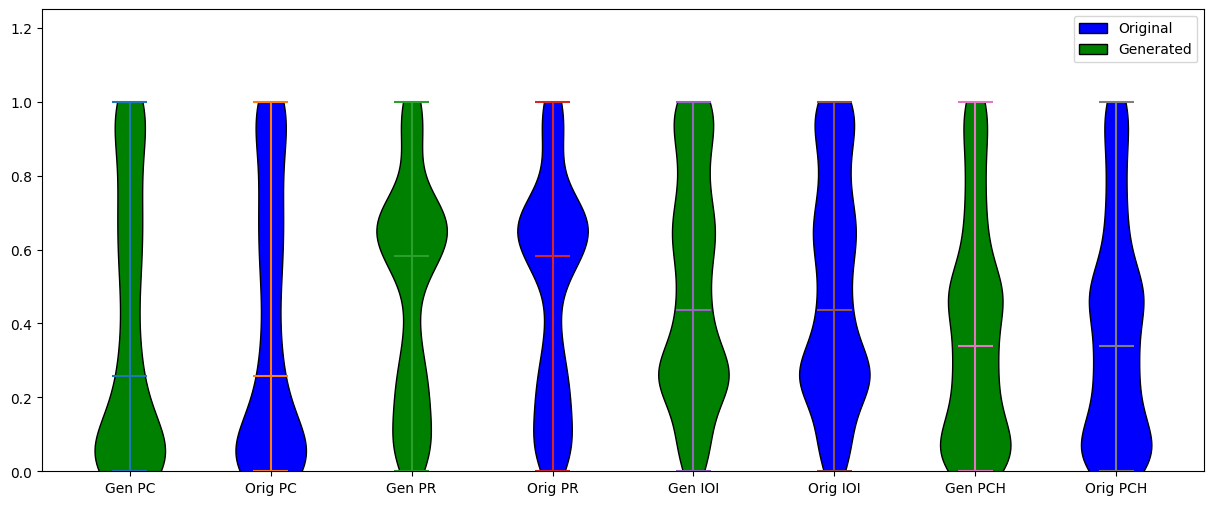

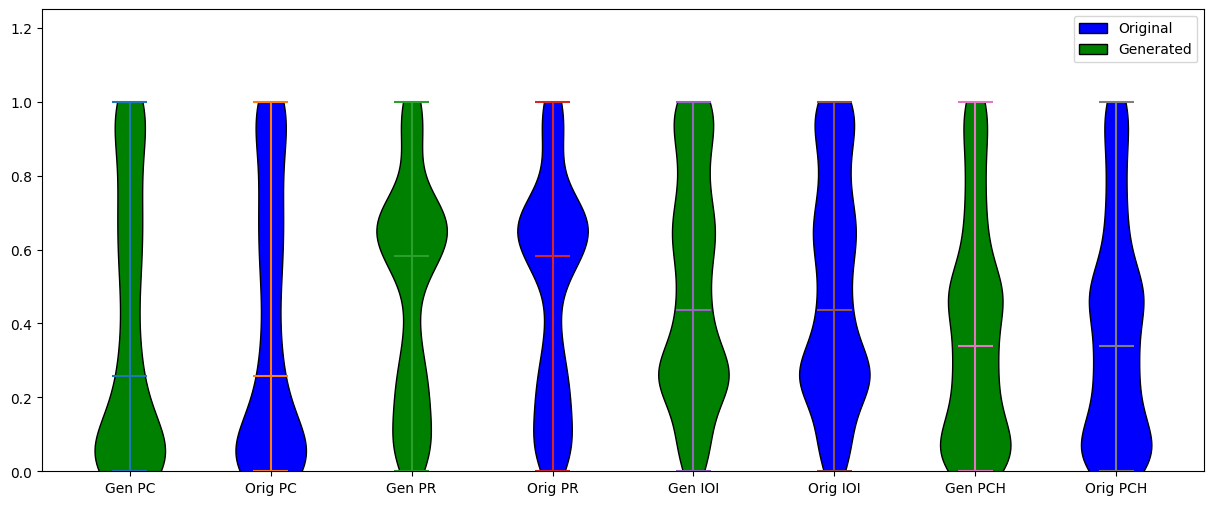

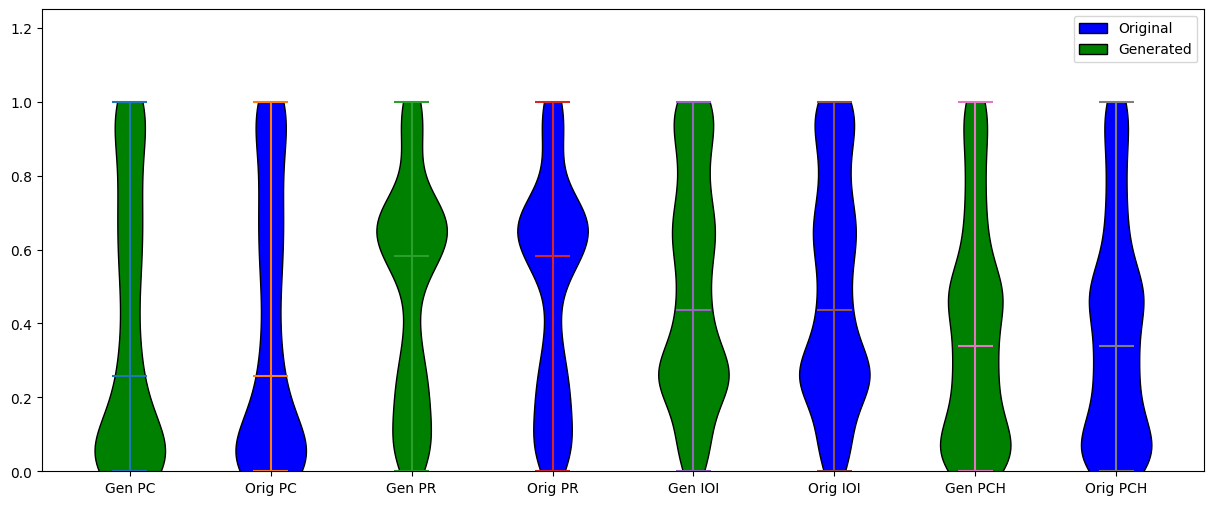

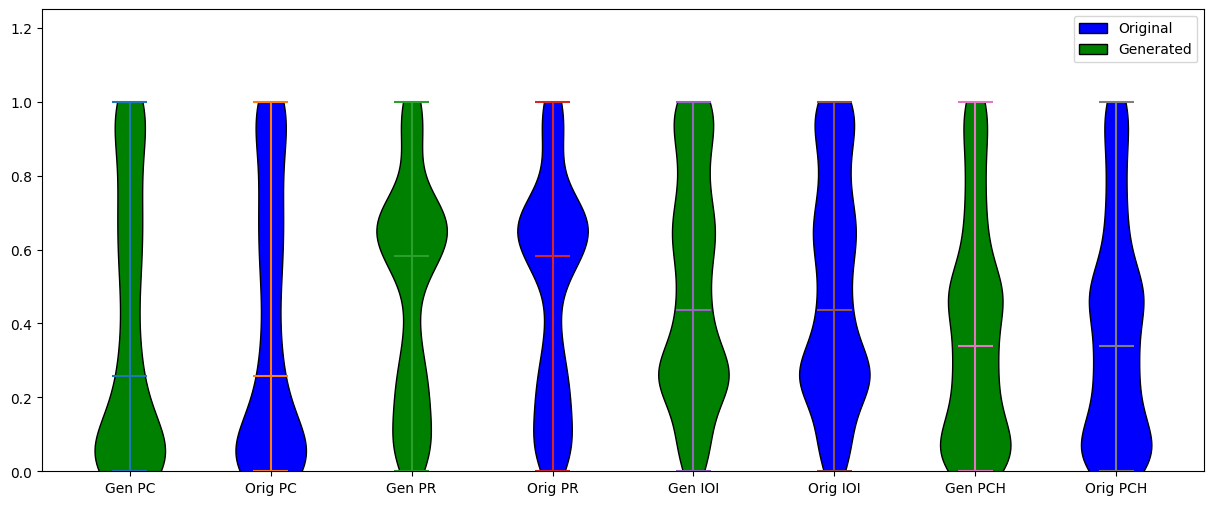

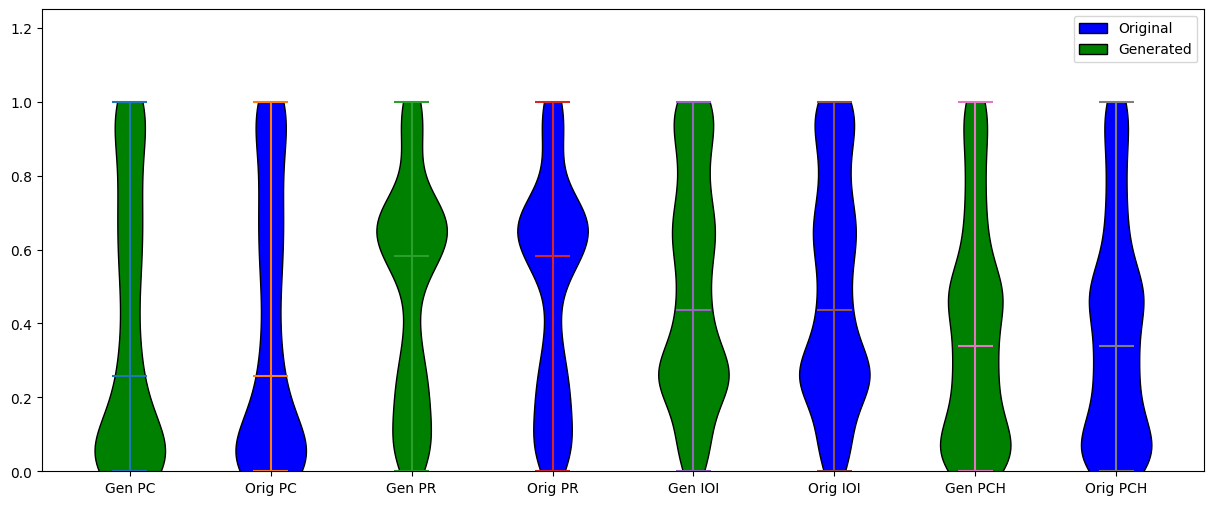

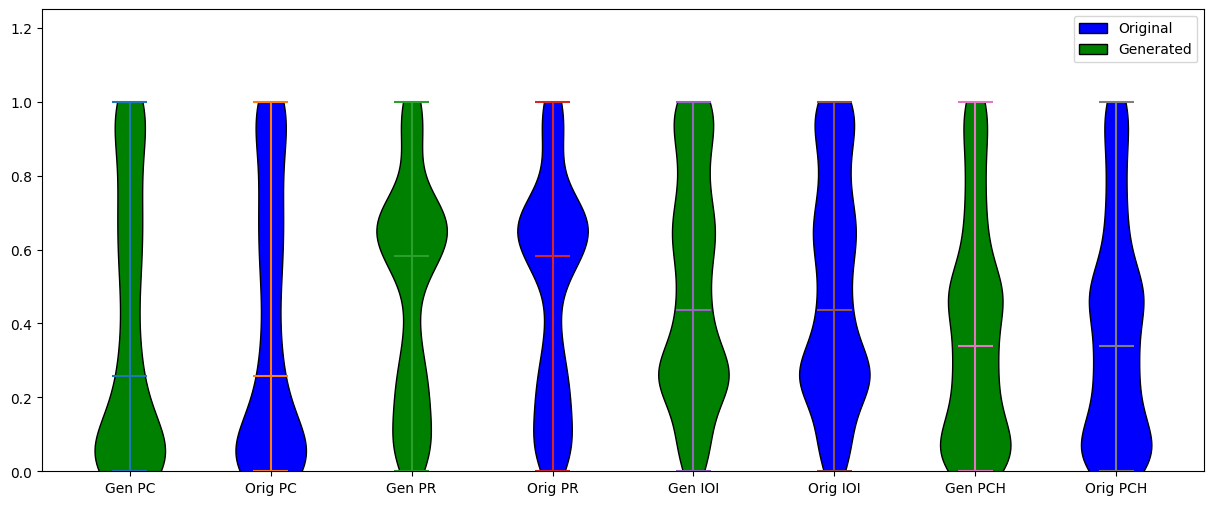

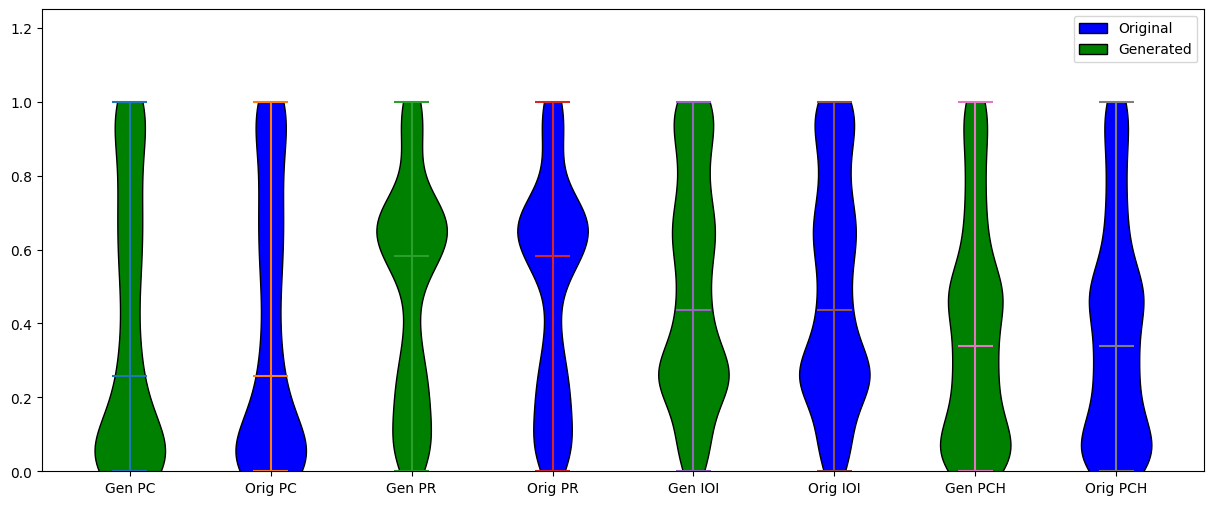

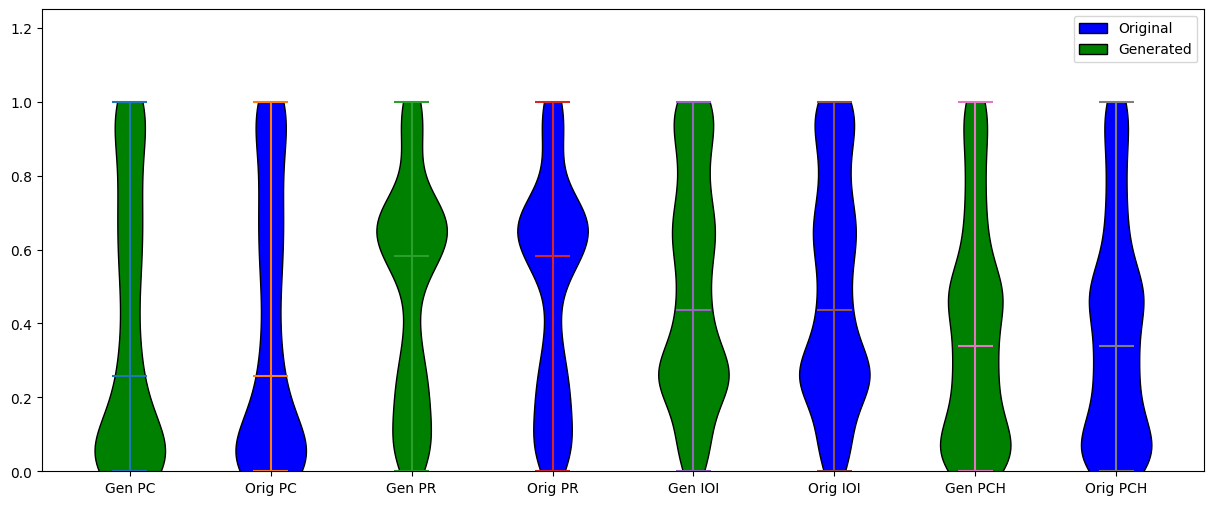

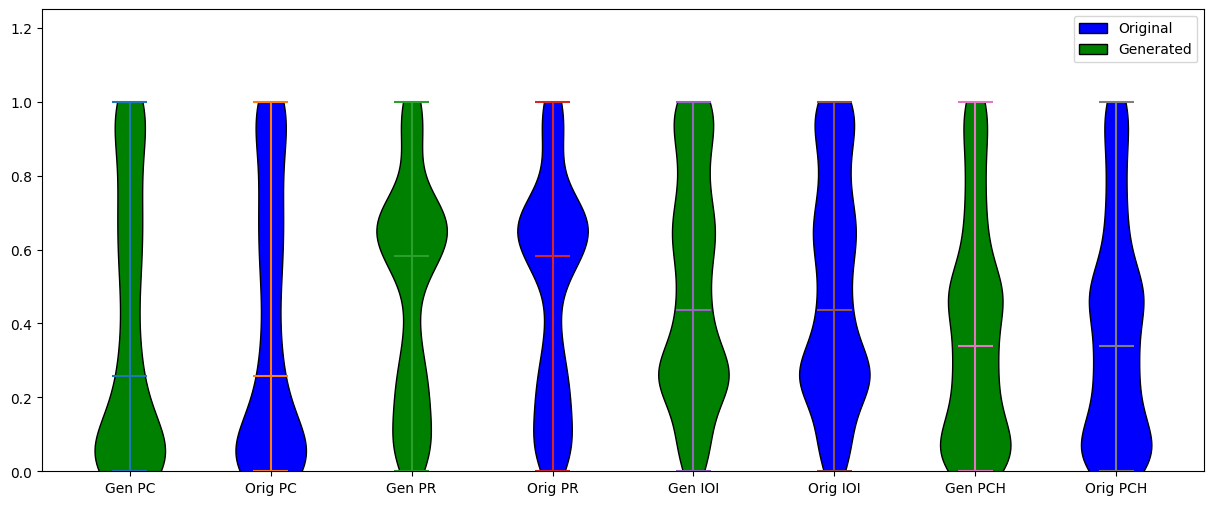

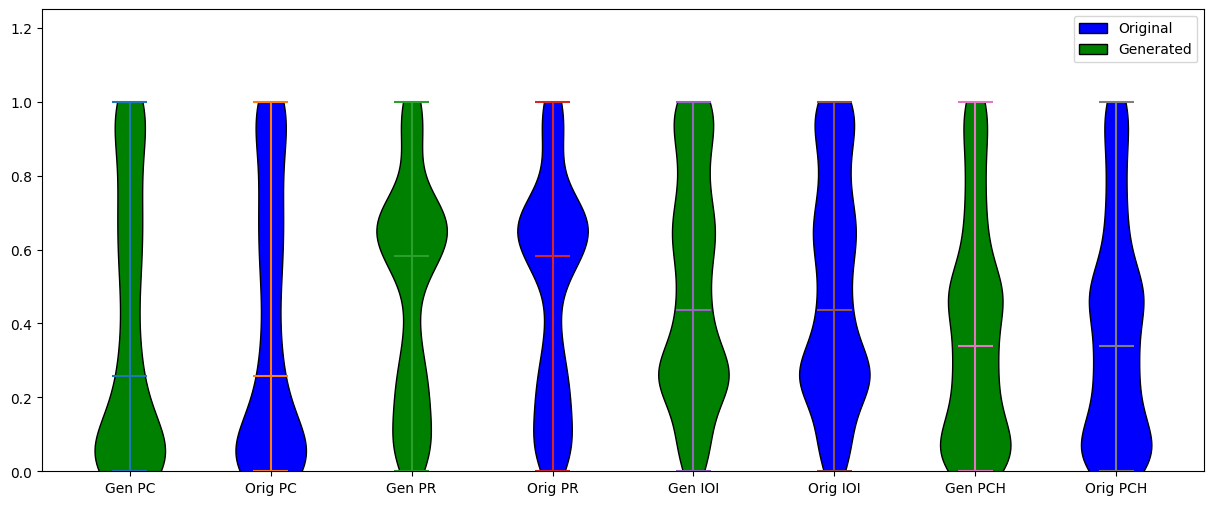

In [72]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Sujeto de interés
worst_subject = 16  # Índice para el sujeto 17
best_subject = 20   # Índice para el sujeto 21
colors = ['blue', 'green']  # Colores para los datos originales y generados
metrics_list = ['PC', 'PR', 'IOI', 'PCH']

# Función para normalizar datos
def normalize_data(data):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

# Función para crear gráficos
def create_plots(subject_index, subject_label, output_dir):
    # Crear el directorio si no existe
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    for fold in range(5):
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6), sharey=True)
        
        for feature in range(4):
            data_generated = itra_set_pdfs[subject_index, fold, feature, :]
            data_original = training_pdfs[feature]
            
            # Normalizar los datos
            data_generated = normalize_data(data_original)
            data_original = normalize_data(data_original)
            
            # Posiciones alternadas
            positions_generated = [feature * 2 + 1]
            positions_original = [feature * 2 + 2]
            
            parts_generated = ax.violinplot(data_generated, positions=positions_generated, showmeans=False, showmedians=True)
            for pc in parts_generated['bodies']:
                pc.set_facecolor(colors[1])
                pc.set_edgecolor('black')
                pc.set_alpha(1)
            
            parts_original = ax.violinplot(data_original, positions=positions_original, showmeans=False, showmedians=True)
            for pc in parts_original['bodies']:
                pc.set_facecolor(colors[0])
                pc.set_edgecolor('black')
                pc.set_alpha(1)
        
        # Etiquetas para el eje x
        labels = []
        for i in range(4):
            labels.append(f'Gen {metrics_list[i]}')
            labels.append(f'Orig {metrics_list[i]}')
        ax.set_xticks(np.arange(1, 9))
        ax.set_xticklabels(labels)
        plt.xticks(rotation=0)
        
        #ax.set_ylabel('Density')
        ax.set_ylim(0, 1.25)  # Ajustar el eje Y para que vaya de 0 a 1, ya que los datos están normalizados

        # Leyenda
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=colors[0], edgecolor='black', label='Original'),
                           Patch(facecolor=colors[1], edgecolor='black', label='Generated')]
        ax.legend(handles=legend_elements, loc='upper right')

        # Guardar la figura
        filename = os.path.join(output_dir, f"{subject_label.replace(' ', '_').lower()}_fold_{fold + 1}.png")
        plt.savefig(filename, bbox_inches='tight')
        plt.show()

# Directorio de salida
output_dir = 'graficas'

# Crear gráficos para el peor sujeto (17)
create_plots(worst_subject, 'Worst Subject (17)', output_dir)

# Crear gráficos para el mejor sujeto (21)
create_plots(best_subject, 'Best Subject (21)', output_dir)


In [73]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Sujeto de interés
# worst_subject = 16  # Índice para el sujeto 17
# best_subject = 20   # Índice para el sujeto 21
# colors = ['blue', 'green']  # Colores para los datos originales y generados
# metrics_list = ['total_used_pitch', 'pitch_range', 'avg_IOI', 'total_pitch_class_histogram']

# # Función para normalizar datos
# def normalize_data(data):
#     min_val = np.min(data)
#     max_val = np.max(data)
#     normalized_data = (data - min_val) / (max_val - min_val)
#     return normalized_data

# # Función para crear gráficos
# def create_plots(subject_index, subject_label):
#     for fold in range(5):
#         fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6), sharey=True)
        
#         for feature in range(4):
#             data_generated = itra_set_pdfs[subject_index, fold, feature, :]
#             data_original = training_pdfs[feature]
            
#             # Normalizar los datos
#             data_generated = normalize_data(data_generated)
#             data_original = normalize_data(data_original)
            
#             # Posiciones alternadas
#             positions_generated = [feature * 2 + 1]
#             positions_original = [feature * 2 + 2]
            
#             parts_generated = ax.violinplot(data_generated, positions=positions_generated, showmeans=False, showmedians=True)
#             for pc in parts_generated['bodies']:
#                 pc.set_facecolor(colors[1])
#                 pc.set_edgecolor('black')
#                 pc.set_alpha(1)
            
#             parts_original = ax.violinplot(data_original, positions=positions_original, showmeans=False, showmedians=True)
#             for pc in parts_original['bodies']:
#                 pc.set_facecolor(colors[0])
#                 pc.set_edgecolor('black')
#                 pc.set_alpha(1)
        
#         # Etiquetas para el eje x
#         labels = []
#         for i in range(4):
#             labels.append(f'Gen {metrics_list[i]}')
#             labels.append(f'Orig {metrics_list[i]}')
#         ax.set_xticks(np.arange(1, 9))
#         ax.set_xticklabels(labels)
#         plt.xticks(rotation=90)
        
#         #ax.set_title(f'{subject_label}, Fold {fold + 1}')
#         ax.set_ylabel('Density')
#         ax.set_ylim(0, 1.25)  # Ajustar el eje Y para que vaya de 0 a 1, ya que los datos están normalizados

#         # Leyenda
#         from matplotlib.patches import Patch
#         legend_elements = [Patch(facecolor=colors[0], edgecolor='black', label='Original'),
#                            Patch(facecolor=colors[1], edgecolor='black', label='Generated')]
#         ax.legend(handles=legend_elements, loc='upper right')

#         # Guardar la figura
#         filename = f"{subject_label.replace(' ', '_').lower()}_fold_{fold + 1}.png"
#         plt.savefig(filename, bbox_inches='tight')
#         plt.show()

# # Crear gráficos para el peor sujeto (17)
# create_plots(worst_subject, 'Worst Subject (17)')

# # Crear gráficos para el mejor sujeto (21)
# create_plots(best_subject, 'Best Subject (21)')


# **Calculo de mean y STD**

In [74]:
import numpy as np
import pandas as pd

# Lista de métricas
metrics_list = ['total_used_pitch', 'pitch_range', 'avg_IOI', 'total_pitch_class_histogram']

# Número de folds y características
num_folds = 5
num_features = 4


# Inicialización de listas para almacenar los resultados
mean_values = np.zeros((num_folds, num_features))
std_values = np.zeros((num_folds, num_features))

for fold in range(num_folds):
    for feature in range(num_features):
        pdfs_list = list(itra_set_pdfs[:, fold, feature, :])
        pdfs_list.insert(0, training_pdfs[feature])
        
        # Calcular media y desviación estándar para cada PDF
        means = [np.mean(pdf) for pdf in pdfs_list]
        stds = [np.std(pdf) for pdf in pdfs_list]
        
        # Almacenar las medias de las medias y las desviaciones estándar
        mean_values[fold, feature] = np.mean(means)
        std_values[fold, feature] = np.mean(stds)

# Crear un DataFrame para almacenar los resultados
results = []

for fold in range(num_folds):
    for feature in range(num_features):
        results.append({
            'Fold': fold + 1,
            'Metric': metrics_list[feature],
            'Mean': round(mean_values[fold, feature], 3),
            'Standard Deviation': round(std_values[fold, feature], 3)
        })

df = pd.DataFrame(results)

# Mostrar la tabla
print(df)


    Fold                       Metric   Mean  Standard Deviation
0      1             total_used_pitch  0.059               0.049
1      1                  pitch_range  0.037               0.032
2      1                      avg_IOI  2.825               2.732
3      1  total_pitch_class_histogram  1.012               0.749
4      2             total_used_pitch  0.060               0.050
5      2                  pitch_range  0.036               0.032
6      2                      avg_IOI  2.960               2.876
7      2  total_pitch_class_histogram  1.014               0.734
8      3             total_used_pitch  0.063               0.053
9      3                  pitch_range  0.038               0.034
10     3                      avg_IOI  2.731               2.811
11     3  total_pitch_class_histogram  1.023               0.753
12     4             total_used_pitch  0.061               0.055
13     4                  pitch_range  0.038               0.036
14     4                 

In [75]:
import numpy as np
import pandas as pd

# Lista de métricas
metrics_list = ['total_used_pitch', 'pitch_range', 'avg_IOI', 'total_pitch_class_histogram']

# Número de folds y características
num_folds = 5
num_features = 4



# Inicialización de listas para almacenar los resultados
mean_values_subjects = np.zeros((33, num_folds, num_features))  # 32 sujetos + 1 training set
std_values_subjects = np.zeros((33, num_folds, num_features))

for fold in range(num_folds):
    for feature in range(num_features):
        pdfs_list = list(itra_set_pdfs[:, fold, feature, :])
        pdfs_list.insert(0, training_pdfs[feature])
        
        # Calcular media y desviación estándar para cada sujeto (incluyendo el training set)
        for subj_idx, pdf in enumerate(pdfs_list):
            mean_values_subjects[subj_idx, fold, feature] = np.mean(pdf)
            std_values_subjects[subj_idx, fold, feature] = np.std(pdf)

# Crear un DataFrame para almacenar los resultados
results = []

for subj_idx in range(33):
    subject_label = 'training set' if subj_idx == 0 else f'Sub {subj_idx}'
    for fold in range(num_folds):
        for feature in range(num_features):
            results.append({
                'Subject': subject_label,
                'Fold': fold + 1,
                'Metric': metrics_list[feature],
                'Mean': round(mean_values_subjects[subj_idx, fold, feature], 3),
                'Standard Deviation': round(std_values_subjects[subj_idx, fold, feature], 3)
            })

df = pd.DataFrame(results)

# Mostrar la tabla
print(df)


          Subject  Fold                       Metric   Mean  \
0    training set     1             total_used_pitch  0.027   
1    training set     1                  pitch_range  0.019   
2    training set     1                      avg_IOI  3.184   
3    training set     1  total_pitch_class_histogram  1.270   
4    training set     2             total_used_pitch  0.027   
..            ...   ...                          ...    ...   
655        Sub 32     4  total_pitch_class_histogram  1.074   
656        Sub 32     5             total_used_pitch  0.072   
657        Sub 32     5                  pitch_range  0.019   
658        Sub 32     5                      avg_IOI  4.644   
659        Sub 32     5  total_pitch_class_histogram  1.096   

     Standard Deviation  
0                 0.024  
1                 0.010  
2                 1.784  
3                 0.963  
4                 0.024  
..                  ...  
655               0.785  
656               0.050  
657      

In [76]:
import numpy as np
import pandas as pd

# Nueva lista de métricas
metrics_list = ['PC', 'PR', 'IOI', 'PCH']

# Número de folds y características
num_folds = 5
num_features = 4

# Datos simulados para itra_set_pdfs y training_pdfs
# Debes reemplazar estos con tus datos reales
np.random.seed(0)  # Para reproducibilidad
itra_set_pdfs = np.random.rand(32, num_folds, num_features, 100)  # Simulación de datos para 32 sujetos
training_pdfs = np.random.rand(num_features, 100)  # Simulación de datos para el set de entrenamiento

# Inicialización de listas para almacenar los resultados
mean_values_subjects = np.zeros((33, num_folds, num_features))  # 32 sujetos + 1 training set
std_values_subjects = np.zeros((33, num_folds, num_features))

for fold in range(num_folds):
    for feature in range(num_features):
        pdfs_list = list(itra_set_pdfs[:, fold, feature, :])
        pdfs_list.insert(0, training_pdfs[feature])
        
        # Calcular media y desviación estándar para cada sujeto (incluyendo el training set)
        for subj_idx, pdf in enumerate(pdfs_list):
            mean_values_subjects[subj_idx, fold, feature] = np.mean(pdf)
            std_values_subjects[subj_idx, fold, feature] = np.std(pdf)

# Promediar los valores de los folds para cada sujeto y característica
mean_values_avg_folds = np.mean(mean_values_subjects, axis=1)
std_values_avg_folds = np.mean(std_values_subjects, axis=1)

# Crear un DataFrame para almacenar los resultados
results = []

for feature in range(num_features):
    results.append({
        'Metric': metrics_list[feature],
        'Training Mean': round(mean_values_avg_folds[0, feature], 3),
        'Training Std': round(std_values_avg_folds[0, feature], 3),
        'Sub 17 Mean': round(mean_values_avg_folds[17, feature], 3),
        'Sub 17 Std': round(std_values_avg_folds[17, feature], 3),
        'Sub 21 Mean': round(mean_values_avg_folds[21, feature], 3),
        'Sub 21 Std': round(std_values_avg_folds[21, feature], 3)
    })

df = pd.DataFrame(results)

# Mostrar la tabla
print(df)


  Metric  Training Mean  Training Std  Sub 17 Mean  Sub 17 Std  Sub 21 Mean  \
0     PC          0.531         0.245        0.495       0.274        0.511   
1     PR          0.489         0.295        0.506       0.283        0.513   
2    IOI          0.518         0.290        0.498       0.284        0.530   
3    PCH          0.439         0.298        0.489       0.286        0.483   

   Sub 21 Std  
0       0.287  
1       0.284  
2       0.276  
3       0.289  


# Tabulacion

In [77]:
import pandas as pd

# Asumiendo que 'pdfs_list' contiene tus datos de PDF y 'labels' tus etiquetas

# Crear un DataFrame vacío para almacenar las medias y desviaciones estándar
stats_df = pd.DataFrame(columns=['Mean', 'STD'])


for i, pdf in enumerate(pdfs_list):
    pdf_data = pd.DataFrame(pdf)  # Convertir el array de numpy a DataFrame
    mean = pdf_data.mean().values[0]  # Calcular la media de los datos del PDF
    std = pdf_data.std().values[0]  # Calcular la desviación estándar de los datos del PDF
    
    
    # Añadir las medias y desviaciones estándar al DataFrame con la etiqueta correspondiente
    stats_df.loc[labels[i]] = [mean, std]

# Mostrar el DataFrame final con las medias y desviaciones estándar
print(stats_df)


                  Mean       STD
training set  0.439298  0.299223
Sub 1         0.488378  0.301034
Sub 2         0.408644  0.271997
Sub 3         0.475357  0.281920
Sub 4         0.497361  0.304447
Sub 5         0.513396  0.299257
Sub 6         0.505166  0.287729
Sub 7         0.511131  0.291411
Sub 8         0.501590  0.277831
Sub 9         0.507418  0.302259
Sub 10        0.493285  0.259526
Sub 11        0.491686  0.278671
Sub 12        0.493731  0.282611
Sub 13        0.505499  0.290629
Sub 14        0.512554  0.292760
Sub 15        0.529439  0.280485
Sub 16        0.502403  0.298347
Sub 17        0.469168  0.292404
Sub 18        0.504016  0.293306
Sub 19        0.507808  0.281747
Sub 20        0.545564  0.286567
Sub 21        0.489884  0.285324
Sub 22        0.488670  0.280565
Sub 23        0.520221  0.313244
Sub 24        0.487324  0.278906
Sub 25        0.512558  0.271279
Sub 26        0.477291  0.276390
Sub 27        0.514627  0.281911
Sub 28        0.490624  0.290575
Sub 29    

In [78]:
import numpy as np
from scipy.stats import entropy

# Suponiendo itra_set_pdfs y training_pdfs ya definidos

# Normalizar las PDFs para asegurar que sumen a 1
normalized_training_pdfs = [pdf / pdf.sum() for pdf in training_pdfs]
normalized_itra_set_pdfs = itra_set_pdfs / itra_set_pdfs.sum(axis=3, keepdims=True)

fold = 1
kl_divergences = np.zeros((itra_set_pdfs.shape[0], 4))  # Preparar array para divergencias KL: sujetos x características

for feature in range(4):
    # PDF del conjunto de entrenamiento para la característica actual
    training_pdf = normalized_training_pdfs[feature]
    
    # Calcular la divergencia KL para cada sujeto con respecto al conjunto de entrenamiento
    for subject in range(itra_set_pdfs.shape[0]):
        subject_pdf = normalized_itra_set_pdfs[subject, fold, feature, :]
        kl_divergence = entropy(training_pdf, subject_pdf)  # Divergencia KL
        kl_divergences[subject, feature] = kl_divergence

# Mostrar resultados
for subject in range(kl_divergences.shape[0]):
    for feature in range(4):
        print(f"Sujeto {subject+1}, Característica {feature+1}: Divergencia KL = {kl_divergences[subject, feature]}")


Sujeto 1, Característica 1: Divergencia KL = 0.44373694932624075
Sujeto 1, Característica 2: Divergencia KL = 0.5866613780980637
Sujeto 1, Característica 3: Divergencia KL = 0.4951160088751802
Sujeto 1, Característica 4: Divergencia KL = 0.6856634932976814
Sujeto 2, Característica 1: Divergencia KL = 0.4579321245945599
Sujeto 2, Característica 2: Divergencia KL = 0.4600374665785815
Sujeto 2, Característica 3: Divergencia KL = 0.3641686991933694
Sujeto 2, Característica 4: Divergencia KL = 0.5073600912018285
Sujeto 3, Característica 1: Divergencia KL = 0.5654448431365525
Sujeto 3, Característica 2: Divergencia KL = 0.4173098320998149
Sujeto 3, Característica 3: Divergencia KL = 0.4745387720049473
Sujeto 3, Característica 4: Divergencia KL = 0.6021874534581673
Sujeto 4, Característica 1: Divergencia KL = 0.4133233152740422
Sujeto 4, Característica 2: Divergencia KL = 0.42972161339033926
Sujeto 4, Característica 3: Divergencia KL = 0.610580713503785
Sujeto 4, Característica 4: Divergencia

In [79]:
import numpy as np
from scipy.stats import entropy
import pandas as pd

# Suponiendo itra_set_pdfs y training_pdfs ya definidos y normalizados como se mencionó antes

fold = 1
kl_divergences = np.zeros((itra_set_pdfs.shape[0], 4))  # Preparar array para divergencias KL: sujetos x características

for feature in range(4):
    training_pdf = normalized_training_pdfs[feature]
    for subject in range(itra_set_pdfs.shape[0]):
        subject_pdf = normalized_itra_set_pdfs[subject, fold, feature, :]
        kl_divergence = entropy(training_pdf, subject_pdf)  # Divergencia KL
        kl_divergences[subject, feature] = kl_divergence

# Crear un DataFrame de pandas con los resultados
subjects_index = [f'Sujeto {i+1}' for i in range(kl_divergences.shape[0])]
features_columns = [f'Característica {i+1}' for i in range(4)]
df_kl = pd.DataFrame(kl_divergences, index=subjects_index, columns=features_columns)

# Mostrar el DataFrame
print(df_kl)

# Guardar el DataFrame en un archivo CSV
df_kl.to_csv('kl_divergencias.csv', index=True)


           Característica 1  Característica 2  Característica 3  \
Sujeto 1           0.443737          0.586661          0.495116   
Sujeto 2           0.457932          0.460037          0.364169   
Sujeto 3           0.565445          0.417310          0.474539   
Sujeto 4           0.413323          0.429722          0.610581   
Sujeto 5           0.375001          0.574133          0.629371   
Sujeto 6           0.373660          0.513594          0.528216   
Sujeto 7           0.489174          0.587158          0.466291   
Sujeto 8           0.465021          0.558914          0.534171   
Sujeto 9           0.414732          0.560870          0.358123   
Sujeto 10          0.448413          0.652793          0.693749   
Sujeto 11          0.496087          0.621408          0.706266   
Sujeto 12          0.378233          0.477701          0.507325   
Sujeto 13          0.414309          0.652990          0.475349   
Sujeto 14          0.319763          0.436163          0.56381

In [80]:
import numpy as np
from scipy.stats import entropy, gaussian_kde
from scipy import integrate
import pandas as pd

def overlap_area(A, B):
    pdf_A = gaussian_kde(A)
    pdf_B = gaussian_kde(B)
    lower_bound = min(np.min(A), np.min(B))
    upper_bound = max(np.max(A), np.max(B))
    # Aumentar el límite de subdivisiones y ajustar la tolerancia para mejorar la precisión
    return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), lower_bound, upper_bound, limit=100, epsabs=1.49e-08, epsrel=1.49e-08)[0]

# Asumiendo que itra_set_pdfs y training_pdfs están previamente definidos y normalizados si es necesario

# Preparar matrices para divergencias KL y áreas de superposición: (sujetos+1) x características
# "+1" para incluir la comparación del conjunto de entrenamiento consigo mismo
kl_divergences = np.zeros((itra_set_pdfs.shape[0] + 1, 4))
overlap_areas = np.zeros((itra_set_pdfs.shape[0] + 1, 4))

fold = 1

for feature in range(4):
    # PDF del conjunto de entrenamiento para la característica actual
    training_pdf = training_pdfs[feature]
    
    # Comparar el conjunto de entrenamiento consigo mismo primero
    kl_divergences[0, feature] = entropy(training_pdf, training_pdf)
    overlap_areas[0, feature] = overlap_area(training_pdf, training_pdf)
    
    # Calcular la divergencia KL y el área de superposición para cada sujeto con respecto al conjunto de entrenamiento
    for subject in range(itra_set_pdfs.shape[0]):
        subject_pdf = itra_set_pdfs[subject, fold, feature, :]
        kl_divergence = entropy(training_pdf, subject_pdf)  # Divergencia KL
        kl_divergences[subject + 1, feature] = kl_divergence
        overlap_areas[subject + 1, feature] = overlap_area(training_pdf, subject_pdf)

# Crear un DataFrame para mostrar los resultados
# Crear etiquetas de sujetos que incluyan el "Training vs. Training" como la primera entrada
subject_labels = ['Training vs. Training'] + [f'Sujeto {i+1}' for i in range(itra_set_pdfs.shape[0])]

results_df = pd.DataFrame({
    'Sujeto': subject_labels,
    'Divergencia KL Característica 1': kl_divergences[:, 0],
    'Divergencia KL Característica 2': kl_divergences[:, 1],
    'Divergencia KL Característica 3': kl_divergences[:, 2],
    'Divergencia KL Característica 4': kl_divergences[:, 3],
    'Área de Superposición Característica 1': overlap_areas[:, 0],
    'Área de Superposición Característica 2': overlap_areas[:, 1],
    'Área de Superposición Característica 3': overlap_areas[:, 2],
    'Área de Superposición Característica 4': overlap_areas[:, 3],
})

print(results_df)


/tmp/ipykernel_34/2448634763.py:12: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), lower_bound, upper_bound, limit=100, epsabs=1.49e-08, epsrel=1.49e-08)[0]


                   Sujeto  Divergencia KL Característica 1  \
0   Training vs. Training                         0.000000   
1                Sujeto 1                         0.443737   
2                Sujeto 2                         0.457932   
3                Sujeto 3                         0.565445   
4                Sujeto 4                         0.413323   
5                Sujeto 5                         0.375001   
6                Sujeto 6                         0.373660   
7                Sujeto 7                         0.489174   
8                Sujeto 8                         0.465021   
9                Sujeto 9                         0.414732   
10              Sujeto 10                         0.448413   
11              Sujeto 11                         0.496087   
12              Sujeto 12                         0.378233   
13              Sujeto 13                         0.414309   
14              Sujeto 14                         0.319763   
15      

In [81]:
import numpy as np
from scipy.stats import entropy, gaussian_kde
from scipy import integrate
import pandas as pd

def overlap_area(A, B):
    pdf_A = gaussian_kde(A)
    pdf_B = gaussian_kde(B)
    lower_bound = min(np.min(A), np.min(B))
    upper_bound = max(np.max(A), np.max(B))
    # Aumentar el límite de subdivisiones y ajustar la tolerancia para mejorar la precisión
    return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), lower_bound, upper_bound, limit=100, epsabs=1.49e-08, epsrel=1.49e-08)[0]

# Asumiendo que itra_set_pdfs y training_pdfs están previamente definidos y normalizados si es necesario

# Sujeto de interés
worst_subject = 16  # Índice para el sujeto 17
best_subject = 20   # Índice para el sujeto 21

# Preparar matrices para divergencias KL y áreas de superposición: (sujetos+1) x características
# "+1" para incluir la comparación del conjunto de entrenamiento consigo mismo
kl_divergences = np.zeros((itra_set_pdfs.shape[0] + 1, 4))
overlap_areas = np.zeros((itra_set_pdfs.shape[0] + 1, 4))

fold = 1

for feature in range(4):
    # PDF del conjunto de entrenamiento para la característica actual
    training_pdf = training_pdfs[feature]
    
    # Comparar el conjunto de entrenamiento consigo mismo primero
    kl_divergences[0, feature] = entropy(training_pdf, training_pdf)
    overlap_areas[0, feature] = overlap_area(training_pdf, training_pdf)
    
    # Calcular la divergencia KL y el área de superposición para cada sujeto con respecto al conjunto de entrenamiento
    for subject in range(itra_set_pdfs.shape[0]):
        subject_pdf = itra_set_pdfs[subject, fold, feature, :]
        kl_divergence = entropy(training_pdf, subject_pdf)  # Divergencia KL
        kl_divergences[subject + 1, feature] = kl_divergence
        overlap_areas[subject + 1, feature] = overlap_area(training_pdf, subject_pdf)

# Crear etiquetas de sujetos que incluyan el "Training vs. Training" como la primera entrada
subject_labels = ['Training vs. Training'] + [f'Sujeto {i+1}' for i in range(itra_set_pdfs.shape[0])]

# Filtrar solo los datos del peor y el mejor sujeto
filtered_subject_indices = [0, worst_subject + 1, best_subject + 1]  # Incluir "Training vs. Training"
filtered_subject_labels = [subject_labels[i] for i in filtered_subject_indices]

# Reorganizar los datos para tener características en las filas y las métricas en las columnas
data = []
for feature in range(4):
    for subject in filtered_subject_indices:
        data.append([
            f'Característica {feature + 1}',
            subject_labels[subject],
            kl_divergences[subject, feature],
            overlap_areas[subject, feature]
        ])

# Crear un DataFrame con la nueva estructura
results_df = pd.DataFrame(data, columns=[
    'Característica',
    'Sujeto',
    'Divergencia KL',
    'Área de Superposición'
])

# Pivotar el DataFrame para tener las métricas en columnas y los sujetos en subcolumnas
pivot_df = results_df.pivot_table(index='Característica', columns='Sujeto', values=['Divergencia KL', 'Área de Superposición'])

# Renombrar las columnas para mayor claridad
pivot_df.columns = [f'{metric} - {subject}' for metric, subject in pivot_df.columns]

print(pivot_df)


/tmp/ipykernel_34/2451635510.py:12: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), lower_bound, upper_bound, limit=100, epsabs=1.49e-08, epsrel=1.49e-08)[0]


                  Divergencia KL - Sujeto 17  Divergencia KL - Sujeto 21  \
Característica                                                             
Característica 1                    0.383786                    0.397031   
Característica 2                    0.439824                    0.396910   
Característica 3                    0.504508                    0.484615   
Característica 4                    0.459827                    0.726926   

                  Divergencia KL - Training vs. Training  \
Característica                                             
Característica 1                                     0.0   
Característica 2                                     0.0   
Característica 3                                     0.0   
Característica 4                                     0.0   

                  Área de Superposición - Sujeto 17  \
Característica                                        
Característica 1                           0.846834   
Característica 2 

In [82]:
import numpy as np
from scipy.stats import entropy, gaussian_kde
from scipy import integrate
import pandas as pd

def overlap_area(A, B):
    pdf_A = gaussian_kde(A)
    pdf_B = gaussian_kde(B)
    lower_bound = min(np.min(A), np.min(B))
    upper_bound = max(np.max(A), np.max(B))
    # Aumentar el límite de subdivisiones y ajustar la tolerancia para mejorar la precisión
    return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), lower_bound, upper_bound, limit=100, epsabs=1.49e-08, epsrel=1.49e-08)[0]

# Asumiendo que itra_set_pdfs y training_pdfs están previamente definidos y normalizados si es necesario

# Sujeto de interés
worst_subject = 16  # Índice para el sujeto 17
best_subject = 20   # Índice para el sujeto 21

# Lista de métricas
metrics_list = ['total_used_pitch', 'pitch_range', 'avg_IOI', 'total_pitch_class_histogram']

# Preparar matrices para divergencias KL y áreas de superposición: (sujetos+1) x características
# "+1" para incluir la comparación del conjunto de entrenamiento consigo mismo
kl_divergences = np.zeros((itra_set_pdfs.shape[0] + 1, 4))
overlap_areas = np.zeros((itra_set_pdfs.shape[0] + 1, 4))

fold = 1

for feature in range(4):
    # PDF del conjunto de entrenamiento para la característica actual
    training_pdf = training_pdfs[feature]
    
    # Comparar el conjunto de entrenamiento consigo mismo primero
    kl_divergences[0, feature] = entropy(training_pdf, training_pdf)
    overlap_areas[0, feature] = overlap_area(training_pdf, training_pdf)
    
    # Calcular la divergencia KL y el área de superposición para cada sujeto con respecto al conjunto de entrenamiento
    for subject in range(itra_set_pdfs.shape[0]):
        subject_pdf = itra_set_pdfs[subject, fold, feature, :]
        kl_divergence = entropy(training_pdf, subject_pdf)  # Divergencia KL
        kl_divergences[subject + 1, feature] = kl_divergence
        overlap_areas[subject + 1, feature] = overlap_area(training_pdf, subject_pdf)

# Crear etiquetas de sujetos que incluyan el "Training vs. Training" como la primera entrada
subject_labels = ['Training vs. Training'] + [f'Sujeto {i+1}' for i in range(itra_set_pdfs.shape[0])]

# Filtrar solo los datos del peor y el mejor sujeto
filtered_subject_indices = [0, worst_subject + 1, best_subject + 1]  # Incluir "Training vs. Training"
filtered_subject_labels = [subject_labels[i] for i in filtered_subject_indices]

# Reorganizar los datos para tener características en las filas y las métricas en las columnas
data = []
for feature in range(4):
    for subject in filtered_subject_indices:
        data.append([
            metrics_list[feature],  # Usar el nombre de la métrica
            subject_labels[subject],
            kl_divergences[subject, feature],
            overlap_areas[subject, feature]
        ])

# Crear un DataFrame con la nueva estructura
results_df = pd.DataFrame(data, columns=[
    'Característica',
    'Sujeto',
    'Divergencia KL',
    'Área de Superposición'
])

# Pivotar el DataFrame para tener las métricas en columnas y los sujetos en subcolumnas
pivot_df = results_df.pivot_table(index='Característica', columns='Sujeto', values=['Divergencia KL', 'Área de Superposición'])

# Renombrar las columnas para mayor claridad
pivot_df.columns = [f'{metric} - {subject}' for metric, subject in pivot_df.columns]

print(pivot_df)


/tmp/ipykernel_34/3674355946.py:12: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), lower_bound, upper_bound, limit=100, epsabs=1.49e-08, epsrel=1.49e-08)[0]


                             Divergencia KL - Sujeto 17  \
Característica                                            
avg_IOI                                        0.504508   
pitch_range                                    0.439824   
total_pitch_class_histogram                    0.459827   
total_used_pitch                               0.383786   

                             Divergencia KL - Sujeto 21  \
Característica                                            
avg_IOI                                        0.484615   
pitch_range                                    0.396910   
total_pitch_class_histogram                    0.726926   
total_used_pitch                               0.397031   

                             Divergencia KL - Training vs. Training  \
Característica                                                        
avg_IOI                                                         0.0   
pitch_range                                                     0.0   
total_

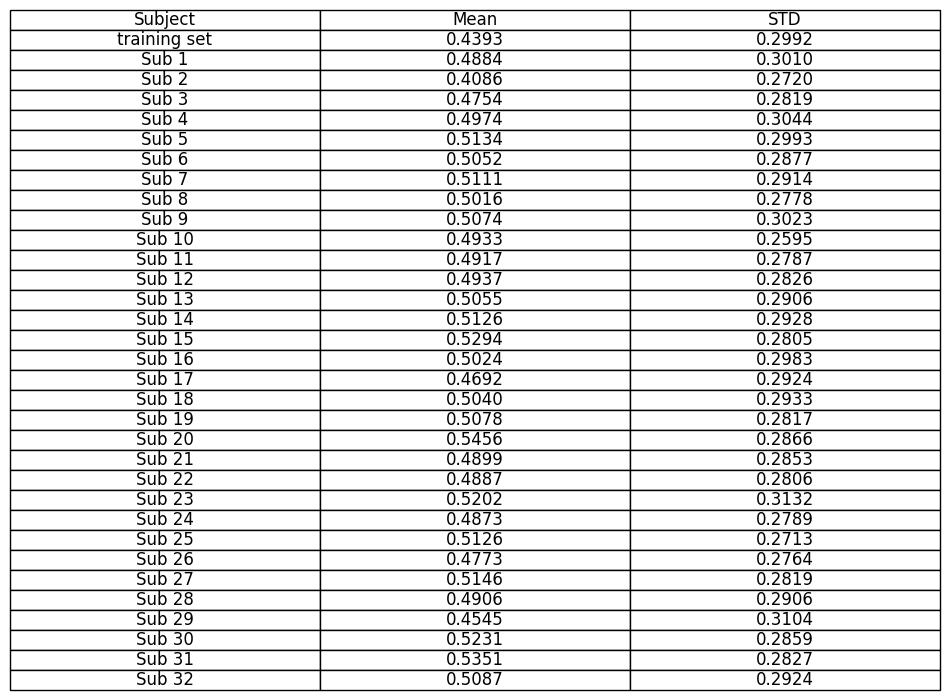

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que 'pdfs_list' contiene tus datos de PDF y 'labels' tus etiquetas

# Crear un DataFrame vacío para almacenar las medias y desviaciones estándar
stats_df = pd.DataFrame(columns=['Subject', 'Mean', 'STD'])

for i, pdf in enumerate(pdfs_list):
    pdf_data = pd.DataFrame(pdf)  # Convertir el array de numpy a DataFrame
    mean = pdf_data.mean().values[0]  # Calcular la media de los datos del PDF
    std = pdf_data.std().values[0]  # Calcular la desviación estándar de los datos del PDF
    
    # Añadir las medias, desviaciones estándar y etiquetas al DataFrame
    stats_df.loc[i] = [labels[i], mean, std]

# Asegurar que los datos estén formateados a cuatro decimales
stats_df['Mean'] = stats_df['Mean'].map("{:.4f}".format)
stats_df['STD'] = stats_df['STD'].map("{:.4f}".format)

# Configuración de la figura
fig, ax = plt.subplots(figsize=(10, 5))  # Ajusta el tamaño según tus necesidades
ax.axis('tight')
ax.axis('off')

# Crear la tabla
table = ax.table(cellText=stats_df.values, colLabels=stats_df.columns, cellLoc='center', loc='center')

# Estilo de la tabla
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Ajusta la escala de la tabla según necesites

# Guardar la figura
plt.savefig('stats_table.png', dpi=300)

# Mostrar la figura en el notebook o script
plt.show()


# Hasta aqui todo ok

In [84]:
import numpy as np

# Suponiendo que kl_divergences y overlap_areas ya han sido calculados como antes

# Número de características (asumiendo que todas las divergencias KL y áreas de superposición tienen el mismo número de características)
num_features = kl_divergences.shape[1]

# Inicializar listas para almacenar arrays de divergencias KL y áreas de superposición para cada característica
kl_by_feature = []
overlap_by_feature = []

# Almacenar datos por característica
for feature in range(num_features):
    # Extraer datos de la divergencia KL y área de superposición para la característica actual de todos los sujetos
    kl_data = kl_divergences[:, feature]  # Divergencias KL para la característica actual
    overlap_data = overlap_areas[:, feature]  # Áreas de superposición para la característica actual
    
    # Añadir los arrays a las listas correspondientes
    kl_by_feature.append(kl_data)
    overlap_by_feature.append(overlap_data)

# kl_by_feature y overlap_by_feature son listas que contienen arrays de numpy
# Cada array en estas listas corresponde a las divergencias KL o áreas de superposición (respectivamente) de todos los sujetos para una característica específica


In [85]:
print(kl_by_feature)

[array([0.        , 0.44373695, 0.45793212, 0.56544484, 0.41332332,
       0.3750007 , 0.37366002, 0.48917424, 0.46502128, 0.41473197,
       0.44841262, 0.49608748, 0.37823285, 0.41430917, 0.31976261,
       0.32835357, 0.54250214, 0.38378582, 0.44547808, 0.42786458,
       0.4453713 , 0.39703068, 0.56809971, 0.40656807, 0.49255217,
       0.41715401, 0.47145979, 0.46199711, 0.54060978, 0.36470947,
       0.41781432, 0.44405331, 0.29367094]), array([0.        , 0.58666138, 0.46003747, 0.41730983, 0.42972161,
       0.57413314, 0.51359364, 0.58715814, 0.55891406, 0.56086982,
       0.6527932 , 0.62140757, 0.47770133, 0.6529897 , 0.43616279,
       0.40382672, 0.54452523, 0.43982393, 0.45404566, 0.42952762,
       0.40282889, 0.39691042, 0.55681596, 0.59481322, 0.62308651,
       0.54540921, 0.43542943, 0.50098766, 0.60808492, 0.62483332,
       0.48582354, 0.51270028, 0.55174434]), array([0.        , 0.49511601, 0.3641687 , 0.47453877, 0.61058071,
       0.62937057, 0.52821613, 0.46629

In [86]:
# Suponiendo que kl_by_feature y overlap_by_feature ya están definidos

# Guardar cada array en un archivo de texto
for i, (kl_array, overlap_array) in enumerate(zip(kl_by_feature, overlap_by_feature)):
    np.savetxt(f"kl_feature_{i+1}.txt", kl_array, header="Divergencia KL")
    np.savetxt(f"overlap_feature_{i+1}.txt", overlap_array, header="Área de Superposición")


In [87]:
# Guardar el DataFrame como un archivo CSV
results_df.to_csv('kl_divergence_and_overlap_areas.csv', index=False)

# Si necesitas incluir el índice (aunque generalmente no es necesario para este tipo de datos):
# results_df.to_csv('kl_divergence_and_overlap_areas_with_index.csv', index=True)


In [88]:
import numpy as np

# Supongamos que tienes un eje x para tus PDFs que es común a todos ellos. 
# Por ejemplo, si tus PDFs son histogramas con 100 bins, entonces x podría ser np.linspace(start, end, num_bins).
x = np.linspace(-10, 10, 100)  # Este es un ejemplo; ajusta según tus datos.

# Cálculo para el conjunto de entrenamiento
mean_training_pdfs = [np.sum(pdf * x) for pdf in training_pdfs]
std_training_pdfs = [np.sqrt(np.sum(pdf * (x - mean)**2)) for pdf, mean in zip(training_pdfs, mean_training_pdfs)]

# Cálculo para el conjunto de sujetos
# Suponiendo itra_set_pdfs tiene una forma de [n_subjects, n_features, n_bins], y usamos el mismo x para todos
mean_itra_set_pdfs = np.sum(itra_set_pdfs * x, axis=2)  # Esto asume que el eje de los bins es el último eje
std_itra_set_pdfs = np.sqrt(np.sum(itra_set_pdfs * (x - mean_itra_set_pdfs[..., np.newaxis])**2, axis=2))


ValueError: operands could not be broadcast together with shapes (32,5,4,100) (32,5,100,100) 

In [ ]:
import numpy as np

# Suponiendo que kl_divergences y overlap_areas ya han sido calculados como antes

# Número de características (asumiendo que todas las divergencias KL y áreas de superposición tienen el mismo número de características)
num_features = kl_divergences.shape[1]

# Inicializar listas para almacenar arrays de divergencias KL y áreas de superposición para cada característica
kl_by_feature = []
overlap_by_feature = []

# Almacenar datos por característica
for feature in range(num_features):
    # Extraer datos de la divergencia KL y área de superposición para la característica actual de todos los sujetos
    kl_data = kl_divergences[:, feature]  # Divergencias KL para la característica actual
    overlap_data = overlap_areas[:, feature]  # Áreas de superposición para la característica actual
    
    # Añadir los arrays a las listas correspondientes
    kl_by_feature.append(kl_data)
    overlap_by_feature.append(overlap_data)

# kl_by_feature y overlap_by_feature son listas que contienen arrays de numpy
# Cada array en estas listas corresponde a las divergencias KL o áreas de superposición (respectivamente) de todos los sujetos para una característica específica


In [ ]:
import numpy as np
from scipy.stats import gaussian_kde
from scipy import integrate

def overlap_area(A, B):
    pdf_A = gaussian_kde(A)
    pdf_B = gaussian_kde(B)
    lower_bound = min(np.min(A), np.min(B))
    upper_bound = max(np.max(A), np.max(B))
    # Aumentar el límite de subdivisiones a 100
    return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), lower_bound, upper_bound, limit=100, epsabs=1.49e-08, epsrel=1.49e-08)[0]

# Preparar array para áreas de superposición: sujetos x características
overlap_areas = np.zeros((itra_set_pdfs.shape[0], 4))

for feature in range(4):
    # PDF del conjunto de entrenamiento para la característica actual
    training_pdf = normalized_training_pdfs[feature]
    
    # Calcular la divergencia KL y el área de superposición para cada sujeto
    for subject in range(itra_set_pdfs.shape[0]):
        subject_pdf = normalized_itra_set_pdfs[subject, fold, feature, :]
        kl_divergence = entropy(training_pdf, subject_pdf)  # Divergencia KL
        kl_divergences[subject, feature] = kl_divergence
        
        # Calcular y almacenar el área de superposición
        overlap_areas[subject, feature] = overlap_area(training_pdf, subject_pdf)

# Mostrar resultados
for subject in range(kl_divergences.shape[0]):
    for feature in range(4):
        print(f"Sujeto {subject+1}, Característica {feature+1}: Divergencia KL = {kl_divergences[subject, feature]}, Área de Superposición = {overlap_areas[subject, feature]}")


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde, entropy
from scipy import integrate

# Asumiendo que itra_set_pdfs y training_pdfs están definidos y normalizados adecuadamente

# Definir función para calcular el área de superposición
def overlap_area(A, B):
    pdf_A = gaussian_kde(A)
    pdf_B = gaussian_kde(B)
    lower_bound = min(np.min(A), np.min(B))
    upper_bound = max(np.max(A), np.max(B))
    return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), lower_bound, upper_bound, limit=100)[0]

fold = 1  # Suponiendo que queremos analizar este fold en particular
kl_divergences = np.zeros((itra_set_pdfs.shape[0], 4))  # Preparar array para divergencias KL: sujetos x características
overlap_areas = np.zeros_like(kl_divergences)  # Preparar array para áreas de superposición

for feature in range(4):
    training_pdf = normalized_training_pdfs[feature]
    
    for subject in range(itra_set_pdfs.shape[0]):
        subject_pdf = normalized_itra_set_pdfs[subject, fold, feature, :]
        
        kl_divergence = entropy(training_pdf, subject_pdf)  # Calcular la divergencia KL
        kl_divergences[subject, feature] = kl_divergence
        
        overlap_area_value = overlap_area(training_pdf, subject_pdf)  # Calcular el área de superposición
        overlap_areas[subject, feature] = overlap_area_value

# Crear DataFrame
results_data = {
    'Sujeto': np.repeat(np.arange(1, itra_set_pdfs.shape[0] + 1), 4),
    'Característica': np.tile(np.arange(1, 5), itra_set_pdfs.shape[0]),
    'Divergencia KL': kl_divergences.flatten(),
    'Área de Superposición': overlap_areas.flatten(),
}

results_df = pd.DataFrame(results_data)

# Ajustar para mostrar las características como texto si lo prefieres
results_df['Característica'] = 'Característica ' + results_df['Característica'].astype(str)

print(results_df)


In [ ]:
# Guardar el DataFrame en un archivo CSV
results_df.to_csv('resultados_divergencia_kl_y_area_superposicion.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde, entropy
from scipy import integrate

# Suponiendo que itra_set_pdfs y training_pdfs están ya definidos

# Normalizar las PDFs para asegurar que sumen a 1
normalized_training_pdfs = [pdf / pdf.sum() for pdf in training_pdfs]
normalized_itra_set_pdfs = itra_set_pdfs / itra_set_pdfs.sum(axis=3, keepdims=True)

fold = 1
kl_divergences = np.zeros((itra_set_pdfs.shape[0], 4))  # Sujetos x características
overlap_areas = np.zeros_like(kl_divergences)
means = np.zeros_like(kl_divergences)
stds = np.zeros_like(kl_divergences)

for feature in range(4):
    training_pdf = normalized_training_pdfs[feature]
    
    for subject in range(itra_set_pdfs.shape[0]):
        subject_pdf = normalized_itra_set_pdfs[subject, fold, feature, :]
        
        kl_divergence = entropy(training_pdf, subject_pdf)
        kl_divergences[subject, feature] = kl_divergence
        
        overlap_area = integrate.quad(lambda x: min(gaussian_kde(training_pdf)(x), gaussian_kde(subject_pdf)(x)), np.min([training_pdf, subject_pdf]), np.max([training_pdf, subject_pdf]), limit=100)[0]
        overlap_areas[subject, feature] = overlap_area
        
        # Asumiendo que puedes calcular la media y la desviación estándar directamente desde los PDFs normalizados
        mean_value = np.mean(subject_pdf)
        std_value = np.std(subject_pdf)
        means[subject, feature] = mean_value
        stds[subject, feature] = std_value

# Compilar todo en un DataFrame
results_data = {
    'Sujeto': np.repeat(np.arange(1, itra_set_pdfs.shape[0] + 1), 4),
    'Característica': np.tile(np.arange(1, 5), itra_set_pdfs.shape[0]),
    'Divergencia KL': kl_divergences.flatten(),
    'Área de Superposición': overlap_areas.flatten(),
    'Media': means.flatten(),
    'Desviación Estándar': stds.flatten()
}

results_df = pd.DataFrame(results_data)

# Ajustar para mostrar las características como texto si lo prefieres
results_df['Característica'] = 'Característica ' + results_df['Característica'].astype(str)

print(results_df)


In [ ]:
from scipy import stats
from scipy import integrate
import numpy as np
from scipy.stats import entropy
import pandas as pd

# Función para calcular el área de solapamiento
def overlap_area(A, B):
    pdf_A = stats.gaussian_kde(A)
    pdf_B = stats.gaussian_kde(B)
    return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), np.min((np.min(A), np.min(B))), np.max((np.max(A), np.max(B))))[0]

num_folds = 5  # Número total de folds

for fold in range(num_folds):
    # Preparar arrays para almacenar las métricas
    metrics_data = np.zeros((itra_set_pdfs.shape[1], 4*4))  # Para sujetos x (características x métricas)

    for feature in range(4):
        training_pdf = normalized_training_pdfs[feature]
        for subject in range(itra_set_pdfs.shape[1]):
            subject_pdf = normalized_itra_set_pdfs[fold, subject, feature, :]
            mean = np.mean(subject_pdf)
            std = np.std(subject_pdf)
            kl_divergence = entropy(training_pdf, subject_pdf)
            overlap = overlap_area(training_pdf, subject_pdf)  # Cálculo del área de solapamiento
            
            # Almacenar las métricas en el array, considerando el orden de las métricas para cada característica
            index = feature * 4  # Calcula el índice de inicio para cada conjunto de métricas
            metrics_data[subject, index:index+4] = [mean, std, kl_divergence, overlap]

    # Crear nombres de las columnas
    columns = []
    for i in range(4):
        columns.extend([
            f'Característica {i+1} - Media',
            f'Característica {i+1} - Desv. Est.',
            f'Característica {i+1} - Divergencia KL',
            f'Característica {i+1} - Overlap Area'
        ])

    # Crear un DataFrame de pandas con los resultados
    subjects_index = [f'Sujeto {i+1}' for i in range(metrics_data.shape[0])]
    df_metrics = pd.DataFrame(metrics_data, index=subjects_index, columns=columns)

    # Guardar el DataFrame en un archivo CSV
    filename = f'metrics_fold_{fold+1}.csv'
    df_metrics.to_csv(filename, index=True)

    print(f'Métricas para el fold {fold+1} guardadas en: {filename}')


In [ ]:
import numpy as np
from scipy.stats import entropy
import pandas as pd

# Suponiendo itra_set_pdfs y training_pdfs ya definidos y normalizados como se indicó anteriormente

num_folds = 5  # Número total de folds

for fold in range(num_folds):
    kl_divergences = np.zeros((itra_set_pdfs.shape[1], 4))  # Ajuste en índices para sujetos x características

    for feature in range(4):
        training_pdf = normalized_training_pdfs[feature]
        for subject in range(itra_set_pdfs.shape[1]):
            subject_pdf = normalized_itra_set_pdfs[fold, subject, feature, :]
            kl_divergence = entropy(training_pdf, subject_pdf)  # Divergencia KL
            kl_divergences[subject, feature] = kl_divergence

    # Crear un DataFrame de pandas con los resultados
    subjects_index = [f'Sujeto {i+1}' for i in range(kl_divergences.shape[0])]
    features_columns = [f'Característica {i+1}' for i in range(4)]
    df_kl = pd.DataFrame(kl_divergences, index=subjects_index, columns=features_columns)

    # Guardar el DataFrame en un archivo CSV
    filename = f'kl_divergencias_fold_{fold+1}.csv'
    df_kl.to_csv(filename, index=True)

    print(f'Datos de divergencia KL para el fold {fold+1} guardados en: {filename}')


In [ ]:
import numpy as np

# Ejemplo de un "vector" del training set para una característica específica,
# representado inicialmente como un valor único.
#training_value = 0.5  # Este es el valor único para la PDF del conjunto de entrenamiento de una característica
# Para obtenerlo como un "vector" (aunque sea de un solo valor), podríamos considerar expandirlo
# aunque conceptualmente sigue siendo un solo valor.
training_set_vector = np.array([training_pdfs])  # Convertimos el valor único en un vector
print("Dimensiones del vector del conjunto de entrenamiento:", training_set_vector.shape)

# Ejemplo de vectores de sujetos (podrían ser más complejos dependiendo de tus datos)
# Supongamos que tienes un arreglo 2D donde cada fila representa la PDF de un sujeto para una característica
subject_pdfs = np.array([itra_set_pdfs])  # 32 sujetos, cada uno con 100 valores para la PDF de una característica
print("Dimensiones de los vectores de los sujetos:", subject_pdfs.shape)

# Si tienes los datos en una estructura diferente, ajusta el acceso a `.shape` acorde a tu caso de uso.


In [ ]:
# import numpy as np
# import pandas as pd
# from scipy.stats import entropy

# # Supongamos que tienes un valor único para la PDF del training set por cada característica
# # y una serie de valores para cada sujeto que representan sus PDFs.

# # Función ajustada para calcular la divergencia KL
# def kl_divergence(p, q):
#     return entropy(p, q, base=np.e)

# # Simulación de datos (reemplaza esto con tus datos reales)
# training_pdfs = [0.5, 0.6, 0.7, 0.8]  # Valor único para la PDF del conjunto de entrenamiento por característica
# num_subjects = 32  # Número de sujetos
# num_features = 4  # Número de características
# fold = 0  # Asumiendo un solo fold para simplificar

# # Simular itra_set_pdfs como un array 3D: sujetos x características x valores PDF
# # Reemplaza esto con tus datos reales
# itra_set_pdfs = np.random.rand(num_subjects, num_features, 100)  # 100 valores simulados por sujeto y característica

# data = []

# for feature in range(num_features):
#     # Expandir el valor único del training set a un array del mismo tamaño que las PDFs de los sujetos
#     expanded_training_pdf = np.full_like(itra_set_pdfs[0, feature, :], training_pdfs[feature])
    
#     for subject in range(num_subjects):
#         # Extraer la PDF del sujeto actual
#         subject_pdf = itra_set_pdfs[subject, feature, :]
        
#         # Calcular la divergencia KL
#         kl_div = kl_divergence(expanded_training_pdf, subject_pdf)
        
#         # Agregar los resultados
#         data.append(['Feature ' + str(feature+1), 'Subject ' + str(subject+1), kl_div])

# # Crear un DataFrame de pandas para los resultados
# df_results = pd.DataFrame(data, columns=['Feature', 'Subject', 'KL Divergence'])

# # Mostrar los primeros resultados
# print(df_results.head())

# # Nota: Este es un esquema simplificado, asegúrate de adaptar las partes específicas según tus estructuras de datos y requerimientos.


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import entropy

# Asumiendo que `training_pdfs` y `itra_set_pdfs` son tus datos,
# y `metrics_list` contiene los nombres de las características.

# Número de sujetos (modifica según tus datos)
num_subjects = 32

# Inicialización de la lista para almacenar los resultados
data = []

# Función para calcular la divergencia KL
# def kl_divergence(p, q):
#     # Asegúrate de que p y q tienen la misma forma
#     if p.shape != q.shape:
#         raise ValueError("Las formas de p y q deben ser iguales para calcular la divergencia KL.")
#     return entropy(p, q)

# def kl_dist(p, q):
#     return entropy(p, q)
# Calculate KL distance between the two PDF
# def kl_dist(A, B, num_sample=1000):
#     return stats.entropy(pdf_A(sample_A), pdf_B(sample_B))

for feature in range(4):
    # Calcular media y desviación estándar para el training set
    mean_training = np.mean(training_pdfs[feature])
    std_training = np.std(training_pdfs[feature])

    # Lista para almacenar la divergencia KL para cada sujeto con respecto al training set
    kl_divergences = []

    for subject in range(num_subjects):
        # Extraer las PDFs del sujeto actual
        subject_pdfs = itra_set_pdfs[:, fold, feature, subject]

        # Calcular media y desviación estándar para el sujeto actual
        mean_subject = np.mean(subject_pdfs)
        std_subject = np.std(subject_pdfs)

        # Calcular la divergencia KL entre el training set y el sujeto actual
        kl_div =  kl_divergences(training_pdfs[feature], subject_pdfs)
        kl_divergences.append(kl_div)

        # Agregar los resultados a la lista de datos
        data.append([metrics_list[feature], 'Subject ' + str(subject+1), mean_training, std_training, mean_subject, std_subject, kl_div])

# Convertir la lista de datos en un DataFrame de pandas para mejor visualización
columns = ['Feature', 'Subject', 'Mean Training', 'Std Training', 'Mean Subject', 'Std Subject', 'KL Divergence']
results_df = pd.DataFrame(data, columns=columns)
 #Mostrar la tabla
print(results_df)

# Si necesitas guardar la tabla en un archivo CSV
# results_df.to_csv('results_table.csv', index=False)


In [ ]:
# from scipy import stats
# import numpy as np
# from scipy import integrate

# # Asumiendo que la función pdf ha sido ajustada para devolver también los puntos muestreados
# def pdf(A, B, num_sample=1000):
#     pdf_A = stats.gaussian_kde(A)
#     pdf_B = stats.gaussian_kde(B)
#     sample_A = np.linspace(np.min(A), np.max(A), num_sample)
#     sample_B = np.linspace(np.min(B), np.max(B), num_sample)
#     return pdf_A(sample_A), pdf_B(sample_B), sample_A, sample_B

# def kl_divergence_numerical(pdf_A, pdf_B, sample_A, sample_B):
#     pdf_B = np.where(pdf_B == 0, np.finfo(float).eps, pdf_B)
#     pdf_A = np.where(pdf_A == 0, np.finfo(float).eps, pdf_A)
#     pdf_B_interpolated = np.interp(sample_A, sample_B, pdf_B)
#     kl_div = pdf_A * np.log(pdf_A / pdf_B_interpolated)
#     kl_div_integral = integrate.trapz(kl_div, sample_A)
#     return kl_div_integral

# # Datos del conjunto de entrenamiento
# training_data = pdfs_list.insert(0, training_pdfs[feature]) # Tu conjunto de entrenamiento aquí

# # Lista o arreglo con los datos de cada sujeto
# subjects_data = list(itra_set_pdfs[:,fold,feature,:]) # Lista con los datos de cada sujeto aquí

# # Calcular la divergencia KL para cada sujeto respecto al conjunto de entrenamiento
# kl_divergences = []

# for subject_data in subjects_data:
#     # Calcula las PDFs usando tu función 'pdf'
#     pdf_training, pdf_subject, sample_training, sample_subject = pdf(training_data, subject_data)
    
#     # Calcula la divergencia KL
#     kl_div = kl_divergence_numerical(pdf_training, pdf_subject, sample_training, sample_subject)
    
#     kl_divergences.append(kl_div)

# # Ahora, 'kl_divergences' contiene la divergencia KL de cada sujeto respecto al conjunto de entrenamiento


In [ ]:
# def overlap_area(A, B):
#     pdf_A = stats.gaussian_kde(A)
#     pdf_B = stats.gaussian_kde(B)
#     return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), np.min((np.min(A), np.min(B))), np.max((np.max(A), np.max(B))))[0]


# # Calculate KL distance between the two PDF
# def kl_dist(A, B, num_sample=1000):
# #    pdf_A = stats.gaussian_kde(A)
# #   pdf_B = stats.gaussian_kde(B)
# #  sample_A = np.linspace(np.min(A), np.max(A), num_sample)
# #  sample_B = np.linspace(np.min(B), np.max(B), num_sample)
#     return stats.entropy(pdf_A(sample_A), pdf_B(sample_B))

In [ ]:
from scipy import integrate
import numpy as np

def kl_divergence_numerical(pdf_A, pdf_B, sample_A, sample_B):
    """
    Calcula la divergencia KL de manera numérica entre dos distribuciones A y B,
    dadas sus PDFs y puntos muestreados.

    Args:
        pdf_A (array): Valores de la PDF de la distribución A en los puntos muestreados.
        pdf_B (array): Valores de la PDF de la distribución B en los puntos muestreados.
        sample_A (array): Puntos muestreados de la distribución A.
        sample_B (array): Puntos muestreados de la distribución B.

    Returns:
        float: La divergencia KL aproximada de A a B.
    """

    # Para evitar divisiones por cero o logaritmos de cero, usamos un valor pequeño donde pdf_B es cero.
    pdf_B = np.where(pdf_B == 0, np.finfo(float).eps, pdf_B)
    pdf_A = np.where(pdf_A == 0, np.finfo(float).eps, pdf_A)

    # Interpolar PDF_B para calcular sus valores en los mismos puntos que sample_A
    pdf_B_interpolated = np.interp(sample_A, sample_B, pdf_B)

    # Calcular la divergencia KL
    kl_div = pdf_A * np.log(pdf_A / pdf_B_interpolated)
    
    # Integra la divergencia KL a lo largo de los puntos muestreados
    kl_div_integral = integrate.trapz(kl_div, sample_A)

    return kl_div_integral

# Ejemplo de uso con tus PDFs
A = np.random.normal(loc=0, scale=1, size=1000)  # Ejemplo de datos para A
B = np.random.normal(loc=0.5, scale=1.5, size=1000)  # Ejemplo de datos para B

pdf_A, pdf_B = pdf(A, B)  # Asumiendo que pdf es tu función definida anteriormente

# Necesitamos también generar los samples como en tu función `pdf`
sample_A = np.linspace(np.min(A), np.max(A), 1000)
sample_B = np.linspace(np.min(B), np.max(B), 1000)

kl_div = kl_divergence_numerical(pdf_A, pdf_B, sample_A, sample_B)
print("Divergencia KL aproximada:", kl_div)
